In [5]:
import numpy as np
import pandas as pd
import time, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [6]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, adjusted_mutual_info_score
from sklearn.metrics import multilabel_confusion_matrix

In [7]:
import tcremb.ml_utils as ml_utils
import benchmark.models as models
import benchmark.metrics as metrics
import tcremb.TCRemb as TCRemb
from sklearn.cluster import KMeans,DBSCAN

In [8]:
label = 'antigen.epitope'
label_s = 'antigen.species'
#label = 'antigen.species_freq'
#output_suf = 'vdjdb_freq'
#output_suf = 'vdjdb'
#output_suf_s = 'vdjdb_s'

## Run with different protototypes

In [28]:
samples_n = [10,50,100,500,1000]
#prototypes_n = [100, 150, 300, 500, 1000,3000, 5000]
prototypes_n = [100, 3000]

In [29]:
def run_tcremb_v(chain, run_name, v_path, proto_path):
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=proto_path_dict)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists_count(chain)
    tcremb.tcremb_dists(chain)
    

In [30]:
for i in samples_n:
    for j in prototypes_n:
        run_name = f'compare_V{i}_{j}'
        proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}
    
        chain='TRA'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        run_tcremb_v(chain, run_name, v_path, proto_path_dict)
        chain='TRB'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        run_tcremb_v(chain, run_name, v_path, proto_path_dict)

{'TRA': 'data/data_preped/olga_humanTRA_100.txt', 'TRB': 'data/data_preped/olga_humanTRB_100.txt'}
[κ0 CASNTGTASKLTF, κ1 CAVLLEYGNKLVF, κ2 CVVSAIMDSNYQLIW, κ3 CLVGATTDSWGKLQF, κ4 CLVGPLSGGYNKLIF, κ5 CAGAVGNQFYF, κ6 CAVNDNDKIIF, κ7 CALSDPTSGGYQKVTF, κ8 CAEAEGGGSQGNLIF, κ9 CAVRATGTASKLTF]
(10153, 292)
11.025001287460327
{'TRA': 'data/data_preped/olga_humanTRA_100.txt', 'TRB': 'data/data_preped/olga_humanTRB_100.txt'}
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]
(21725, 301)
18.589849948883057
{'TRA': 'data/data_preped/olga_humanTRA_3000.txt', 'TRB': 'data/data_preped/olga_humanTRB_3000.txt'}


FileNotFoundError: [Errno 2] No such file or directory: 'data/data_preped/olga_humanTRA_3000.txt'

## Compare clustering

In [5]:
samples_n = [10,50,100,500,1000]
#samples_n = [500,1000]

In [6]:
metrics_tcremb = {}

### dbscan eps

In [7]:
method = 'dbscan'
metrics_tcremb[method]={}
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
#params = [3, 1500]

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


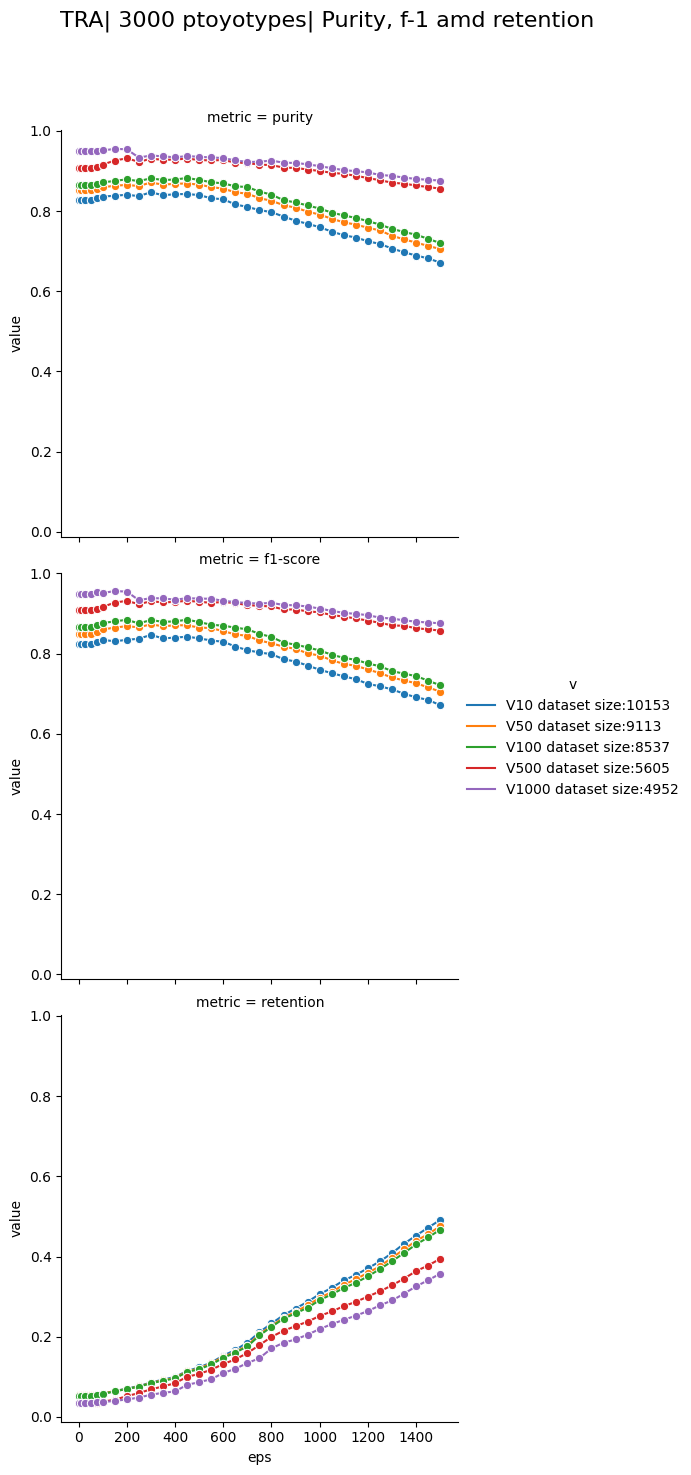

In [11]:
chain = 'TRA'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


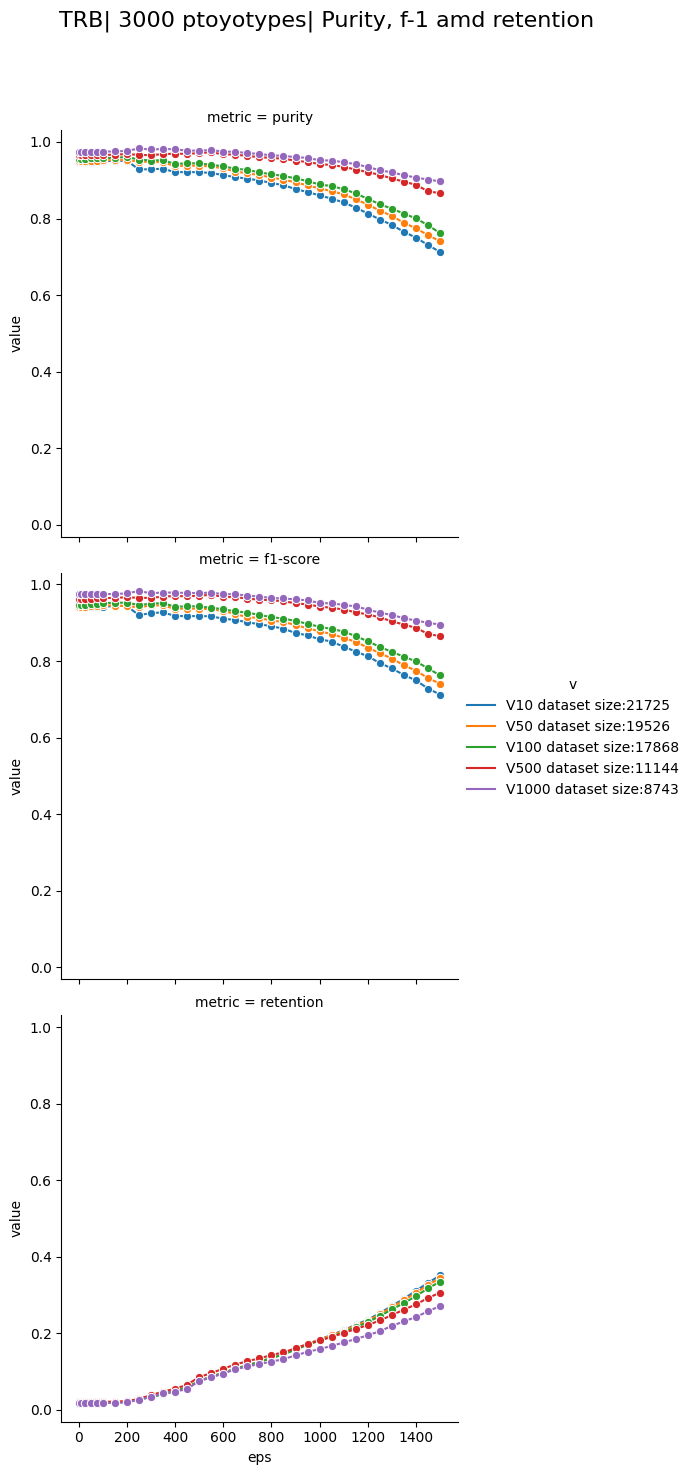

In [18]:
chain = 'TRB'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{method}_{chain}.png")

### Kmeans n_clusters

In [13]:
method = 'kmeans'
metrics_tcremb[method]={}

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


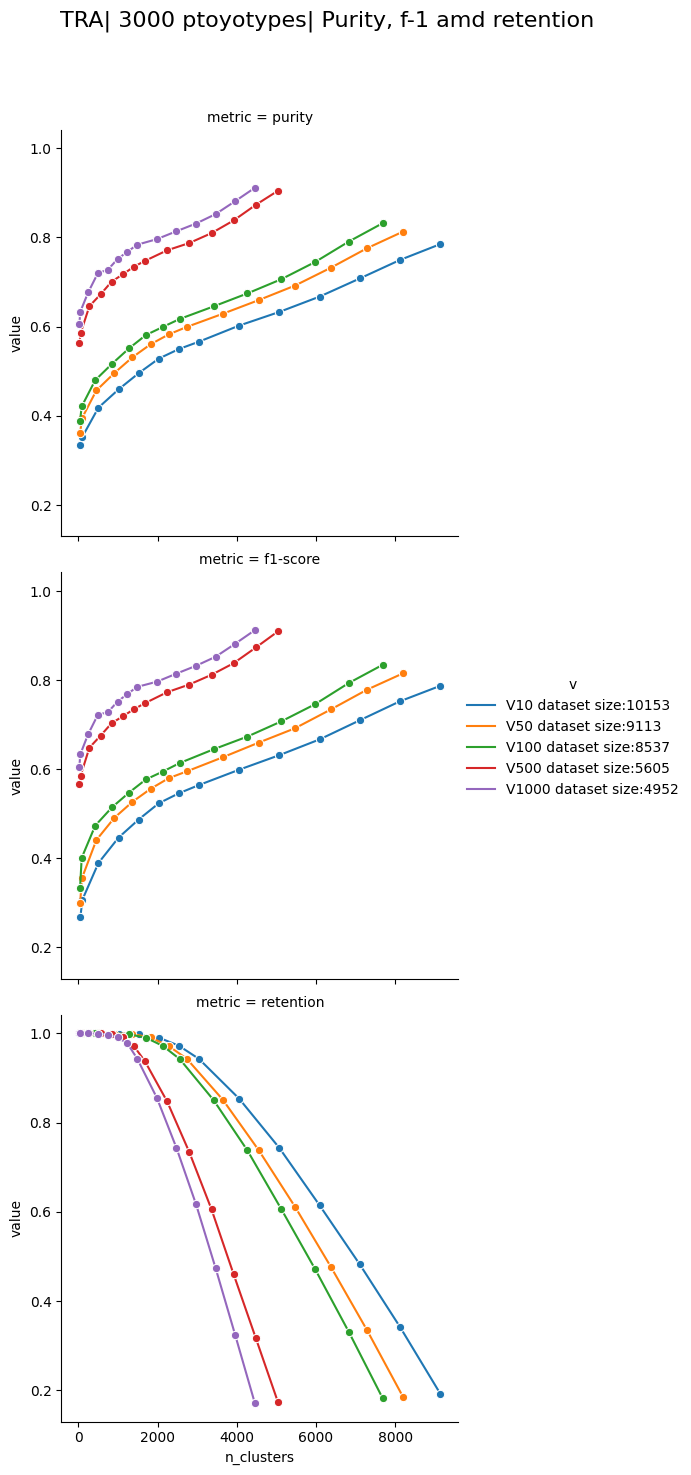

In [15]:
chain = 'TRA'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


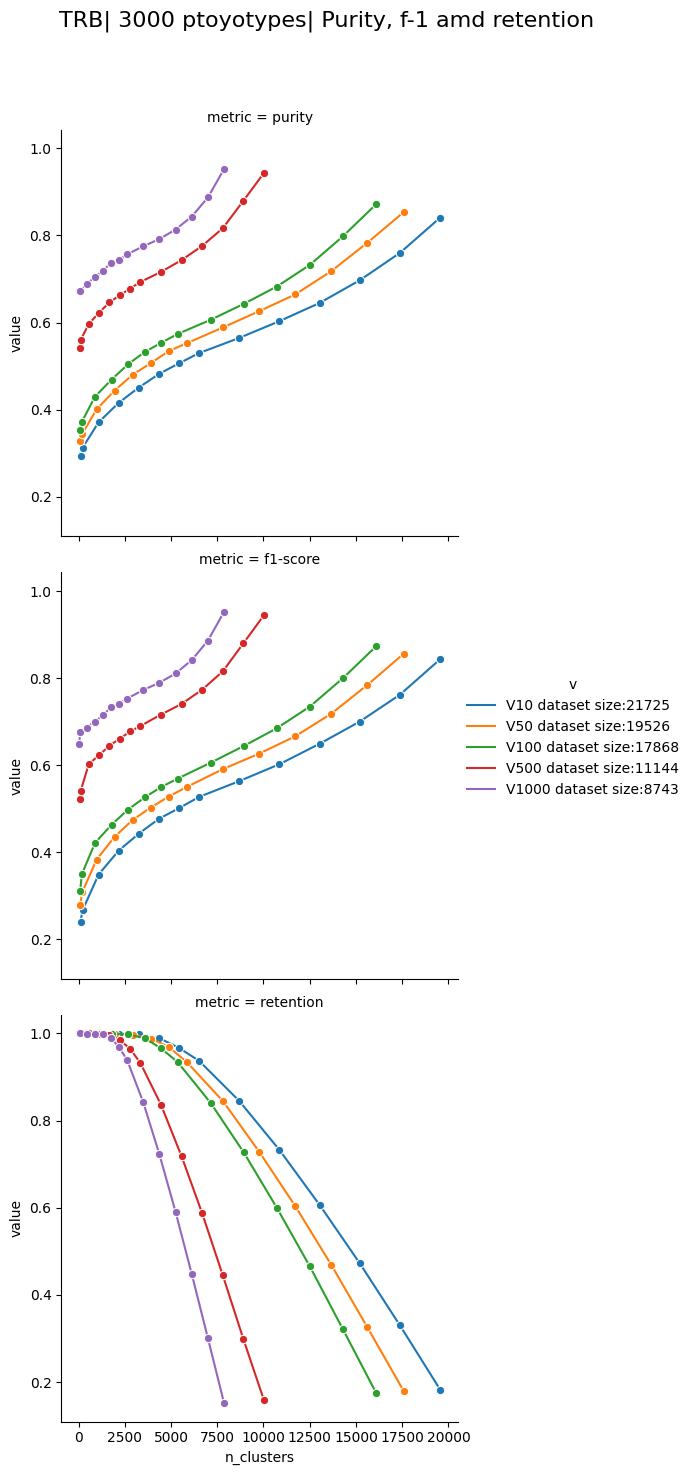

In [17]:
chain = 'TRB'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
#method = 'kmeans'
#metrics_tcremb[method]={}

In [13]:
n_prototypes = 100
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


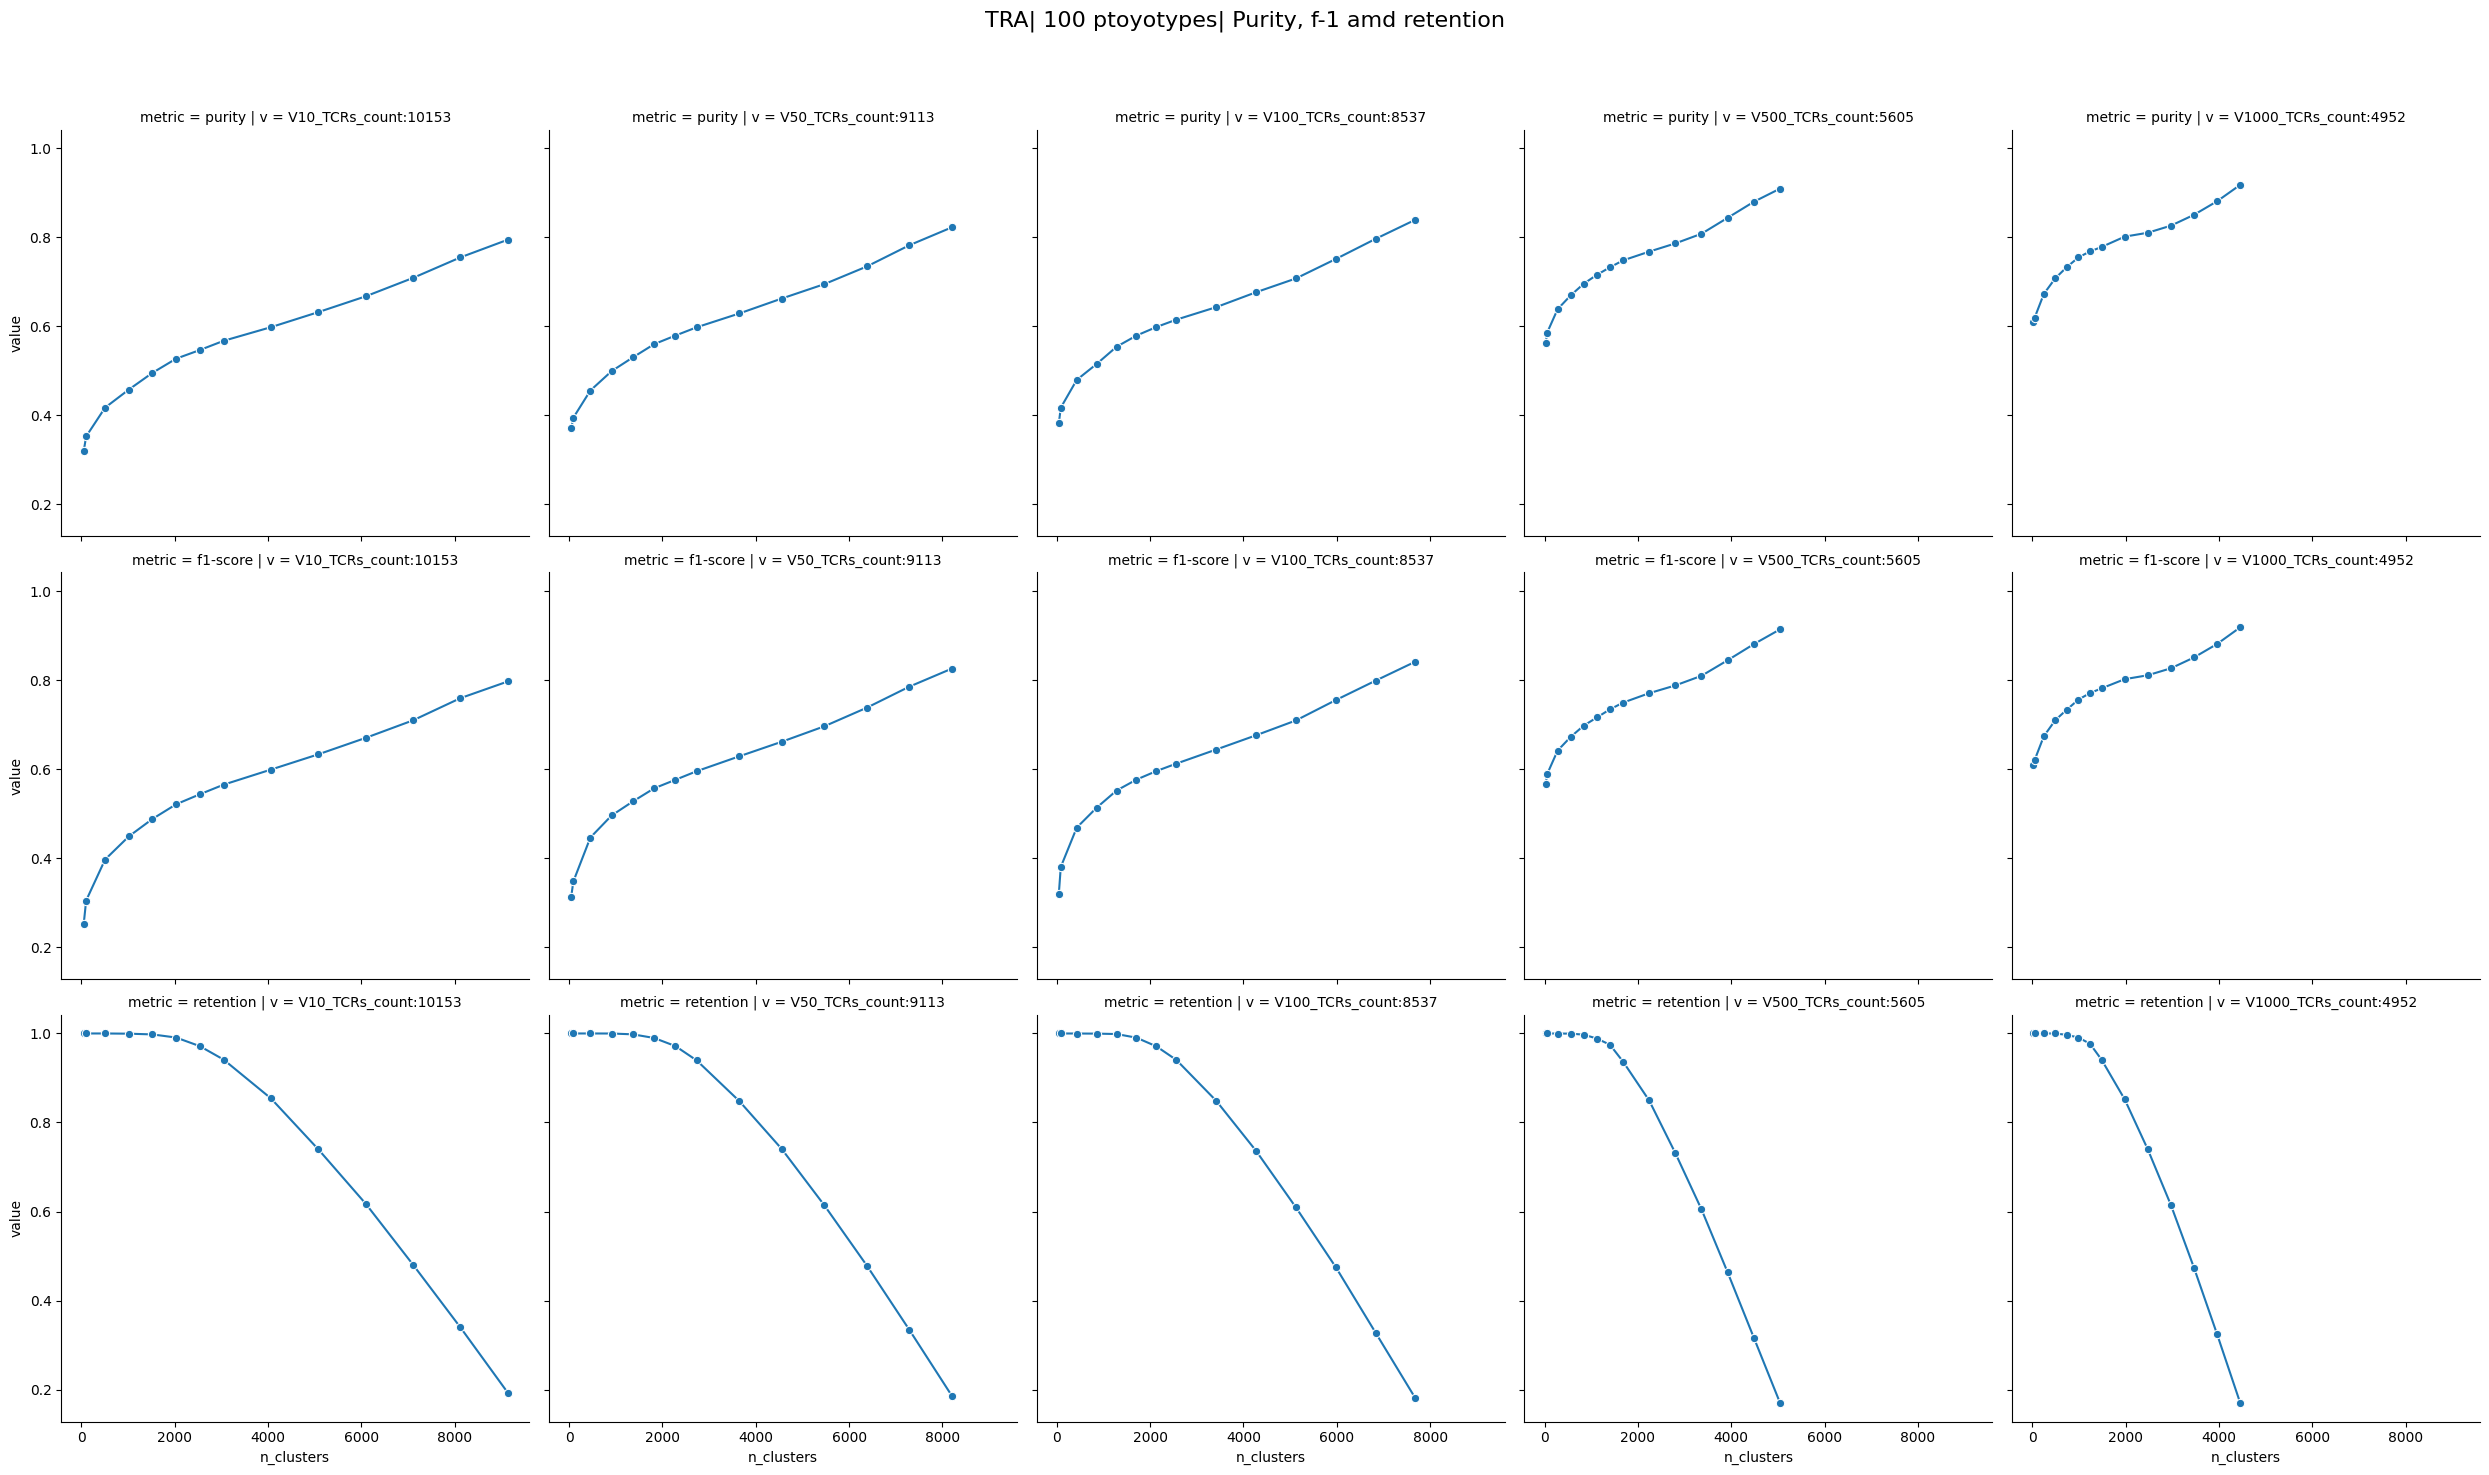

In [15]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


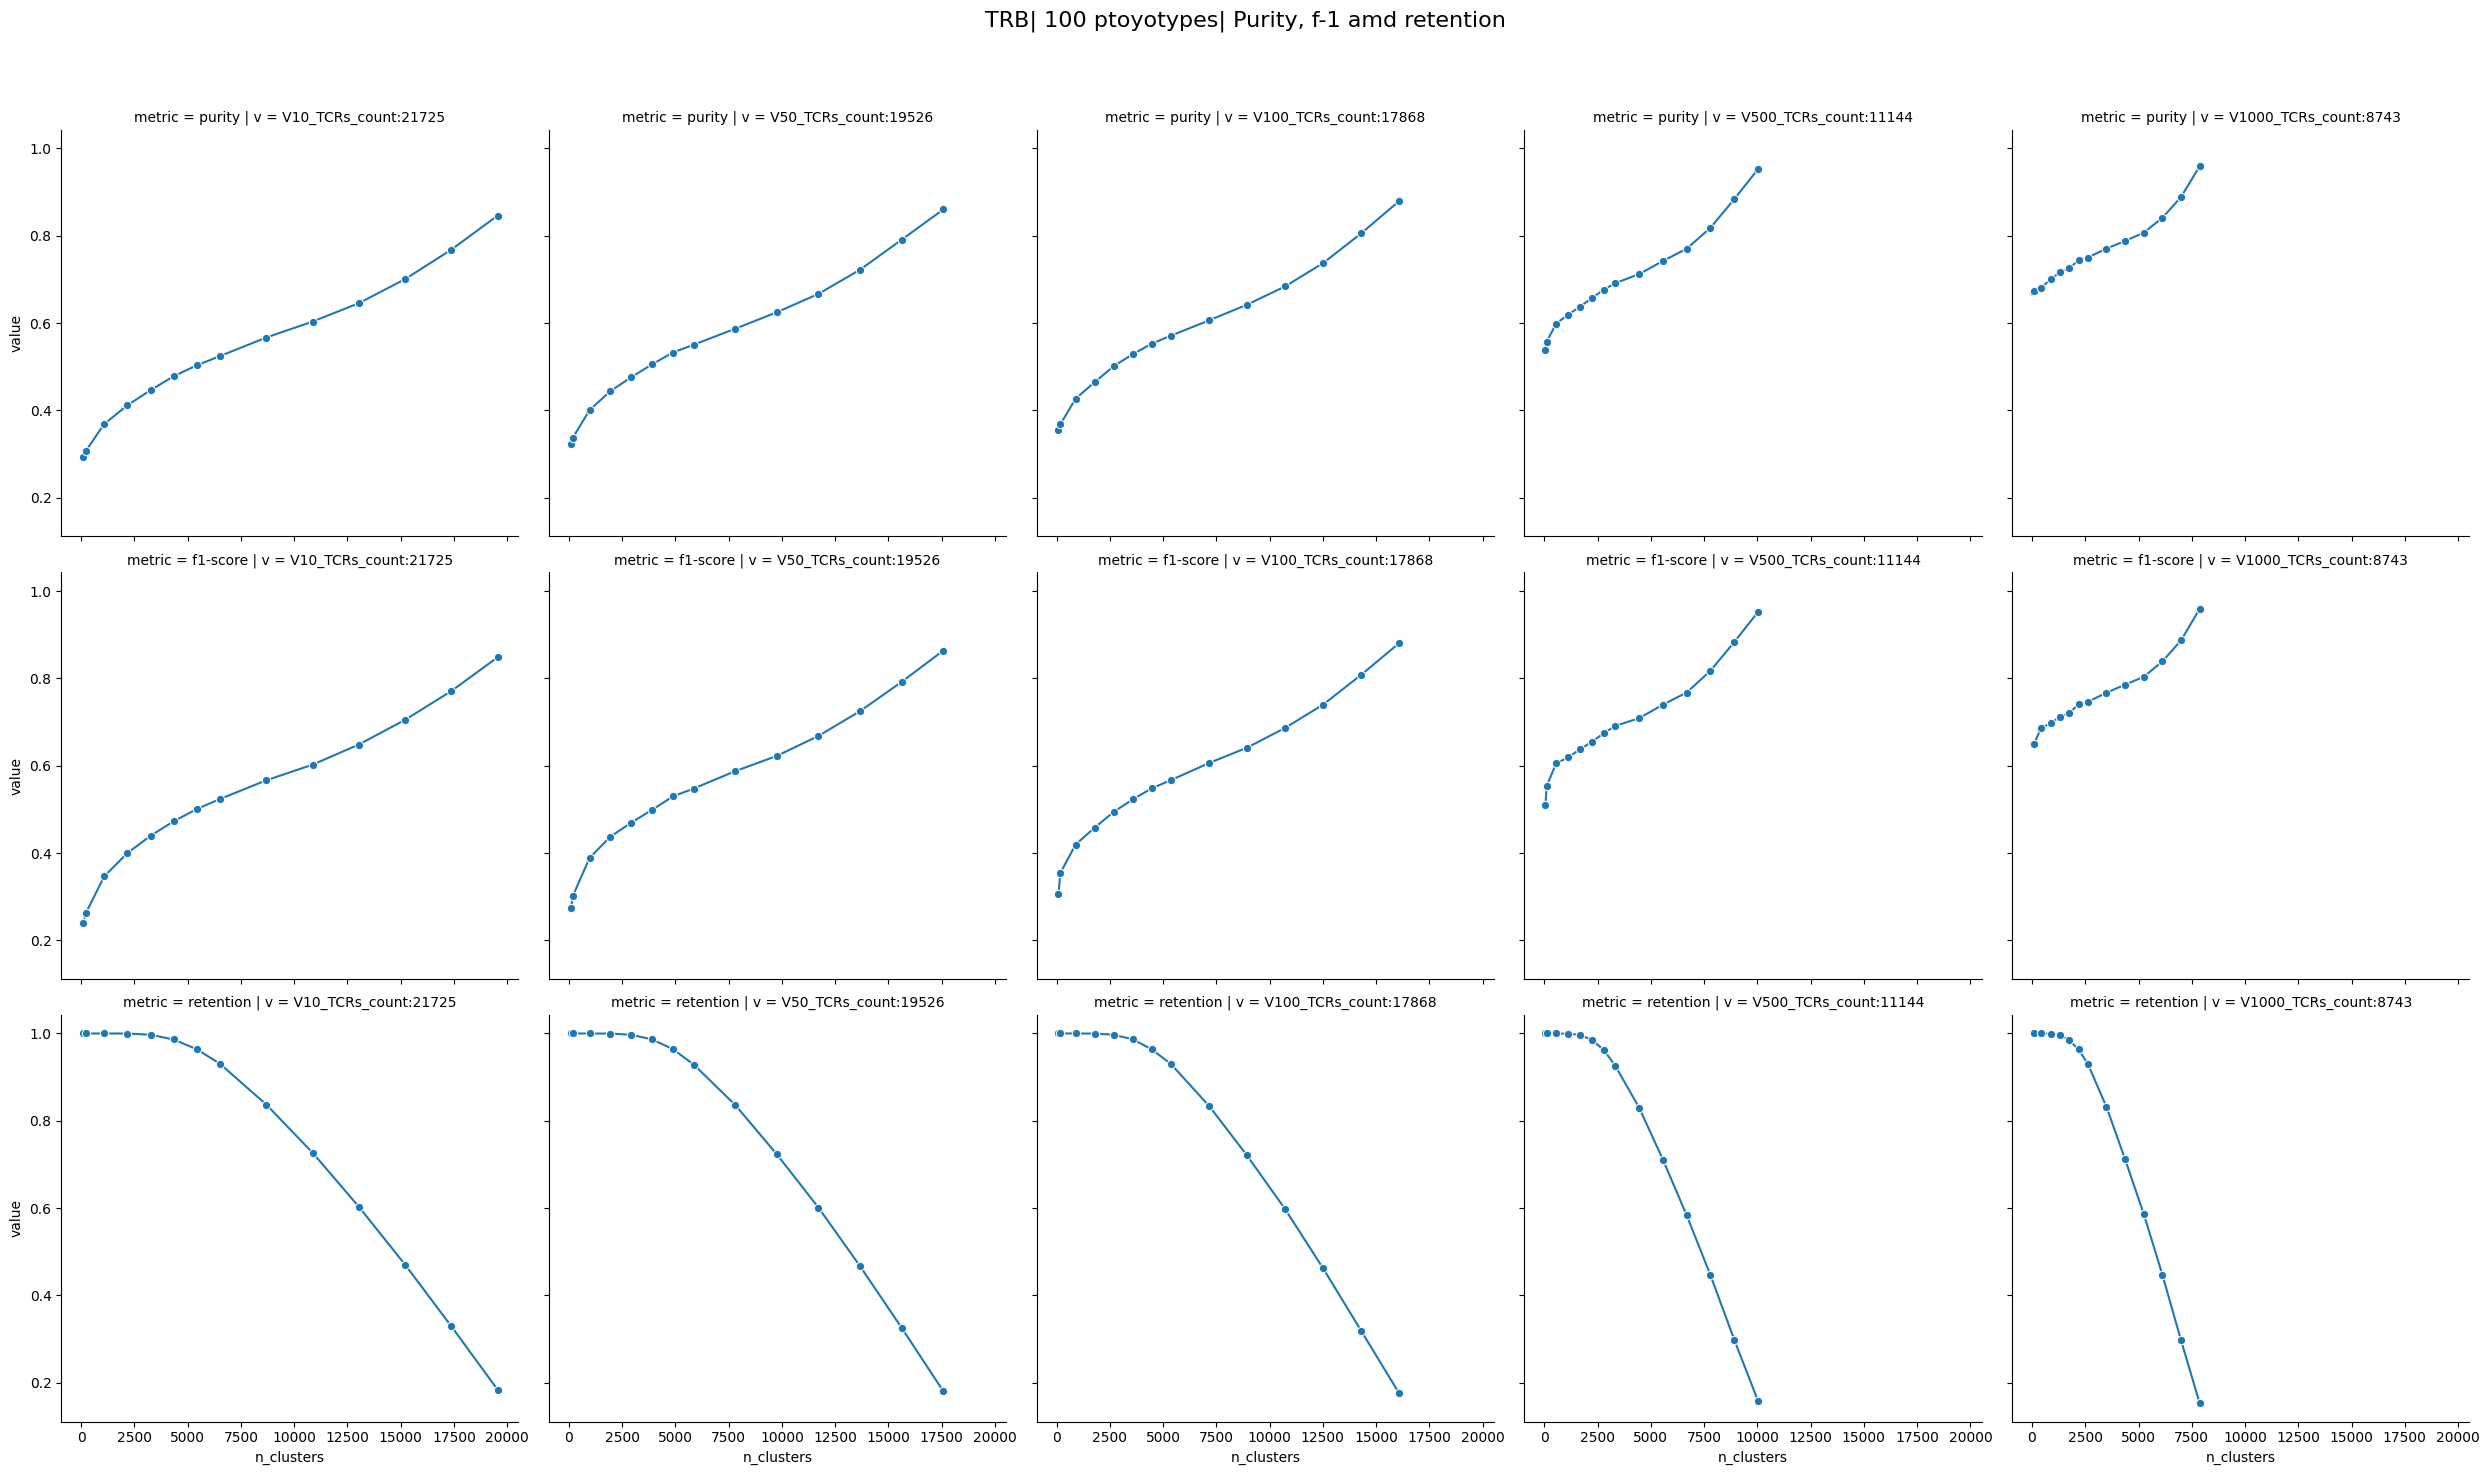

In [17]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [18]:
n_prototypes = 1000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


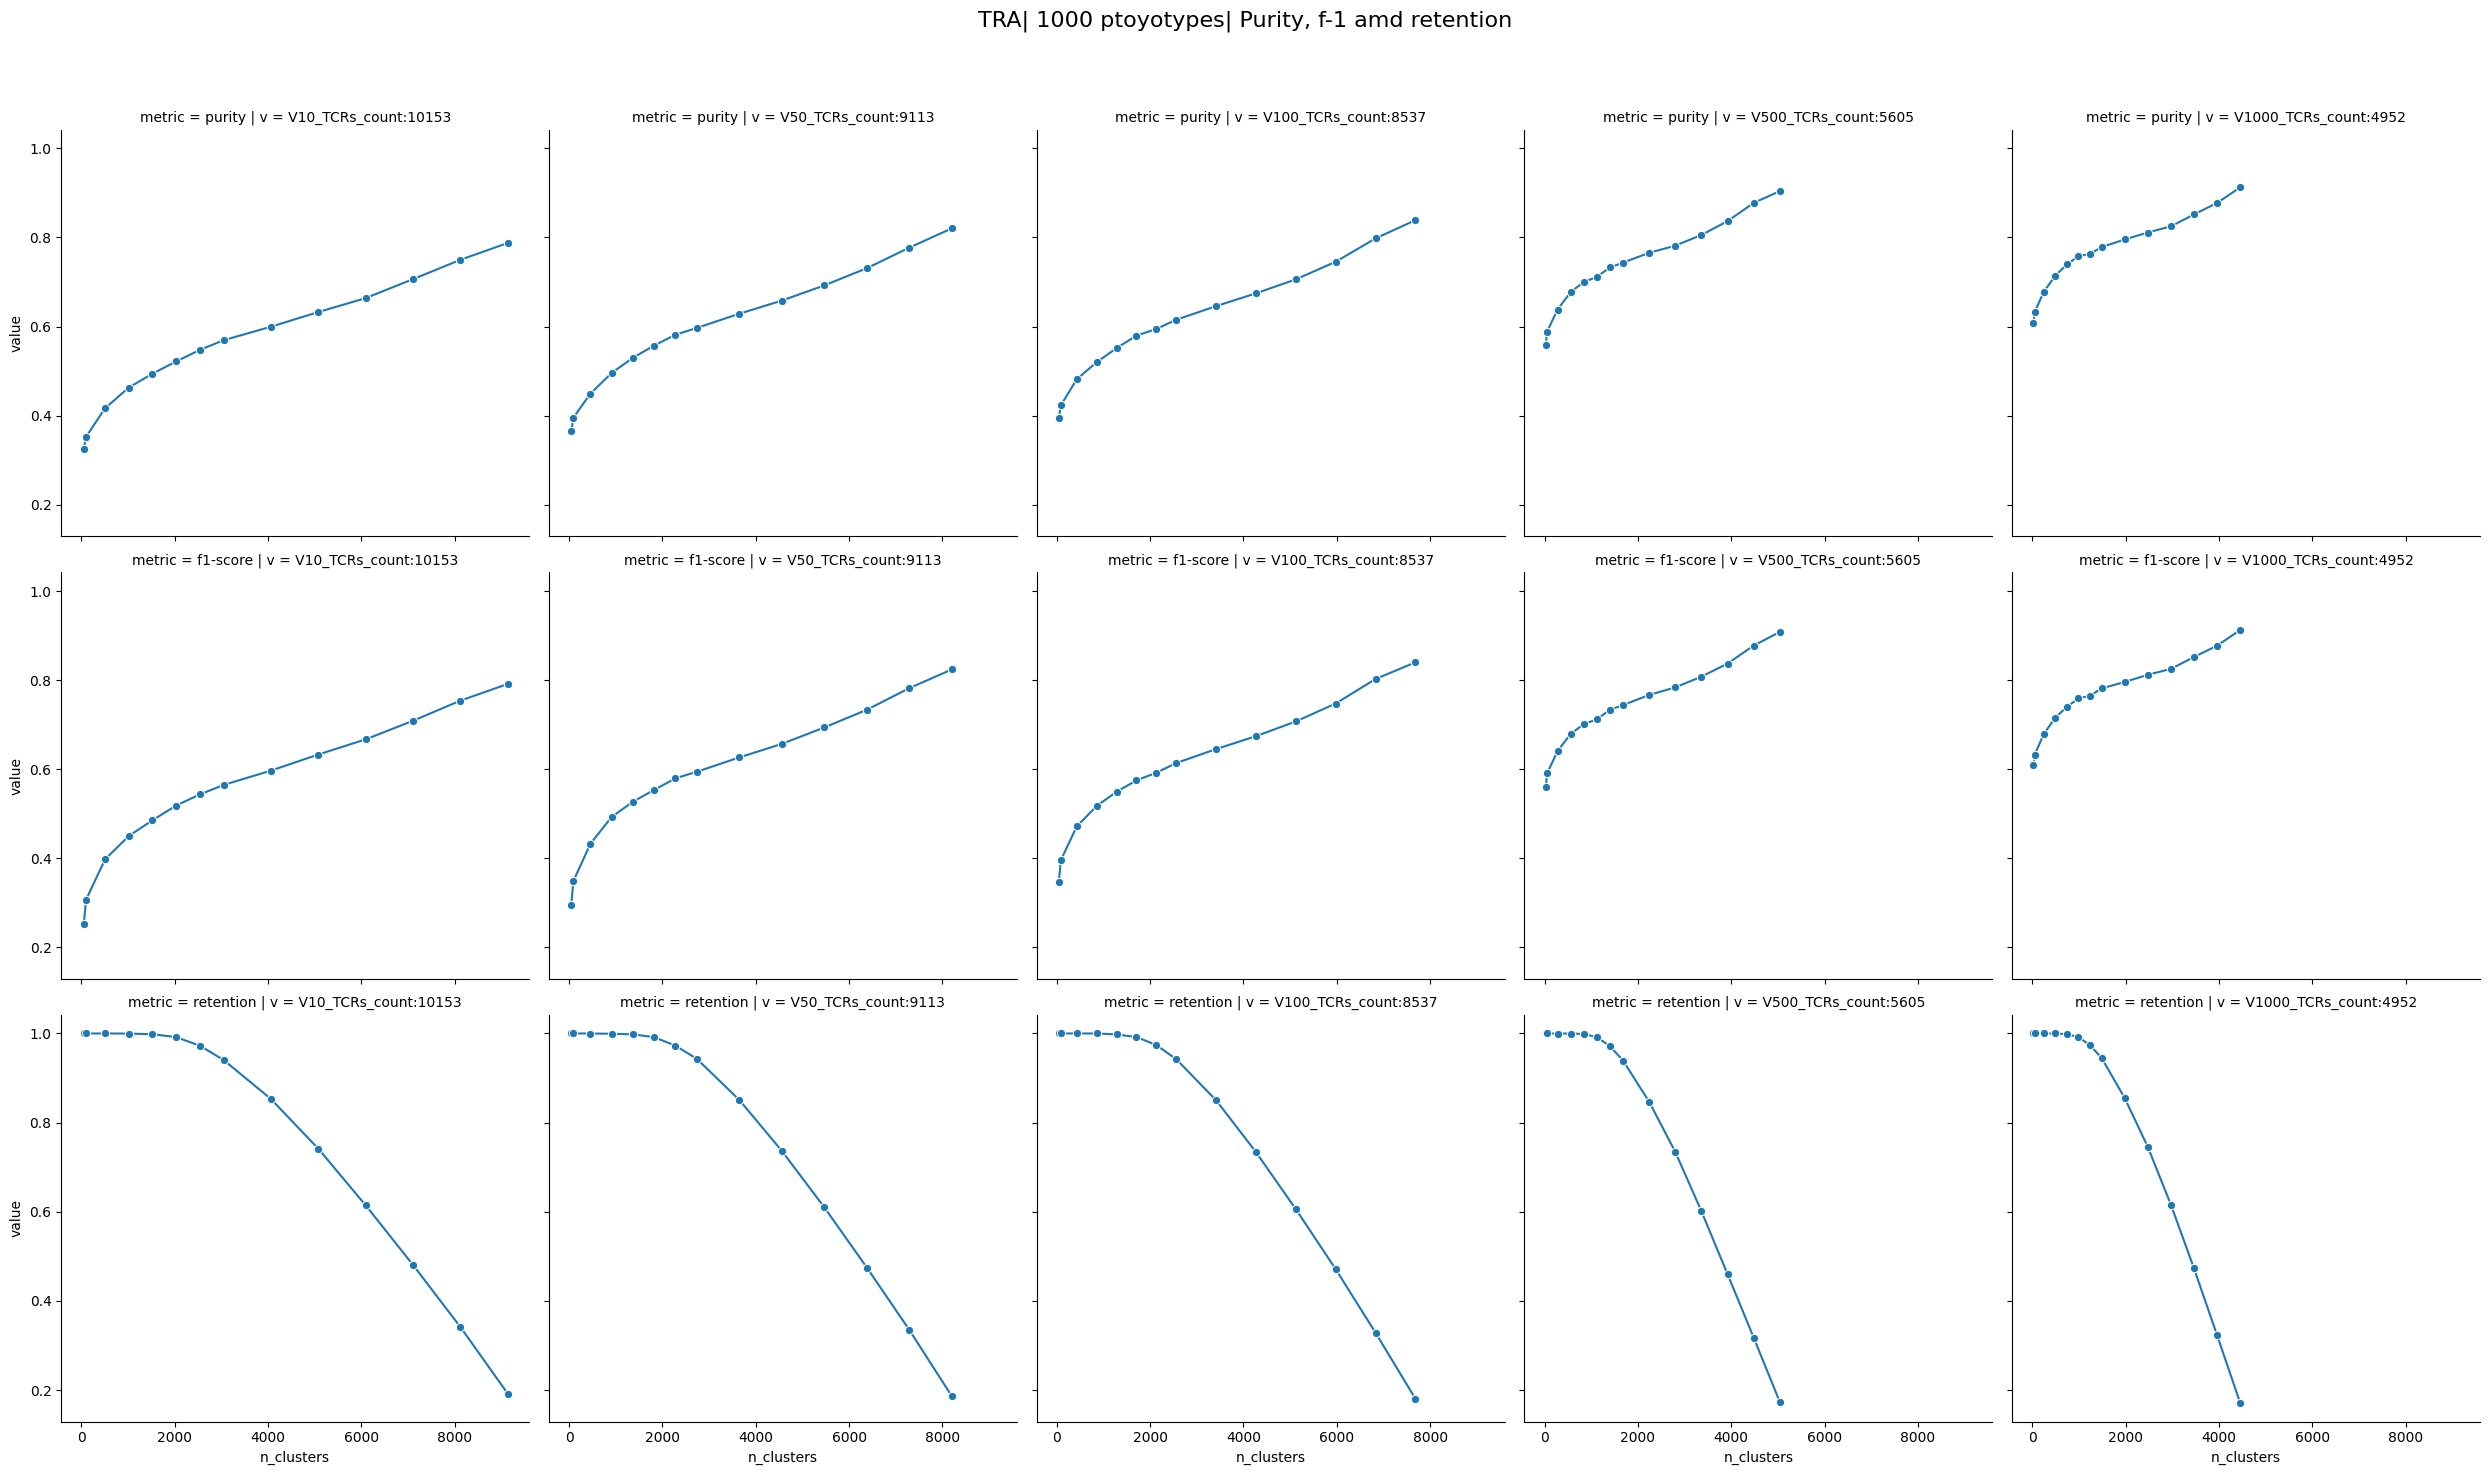

In [20]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


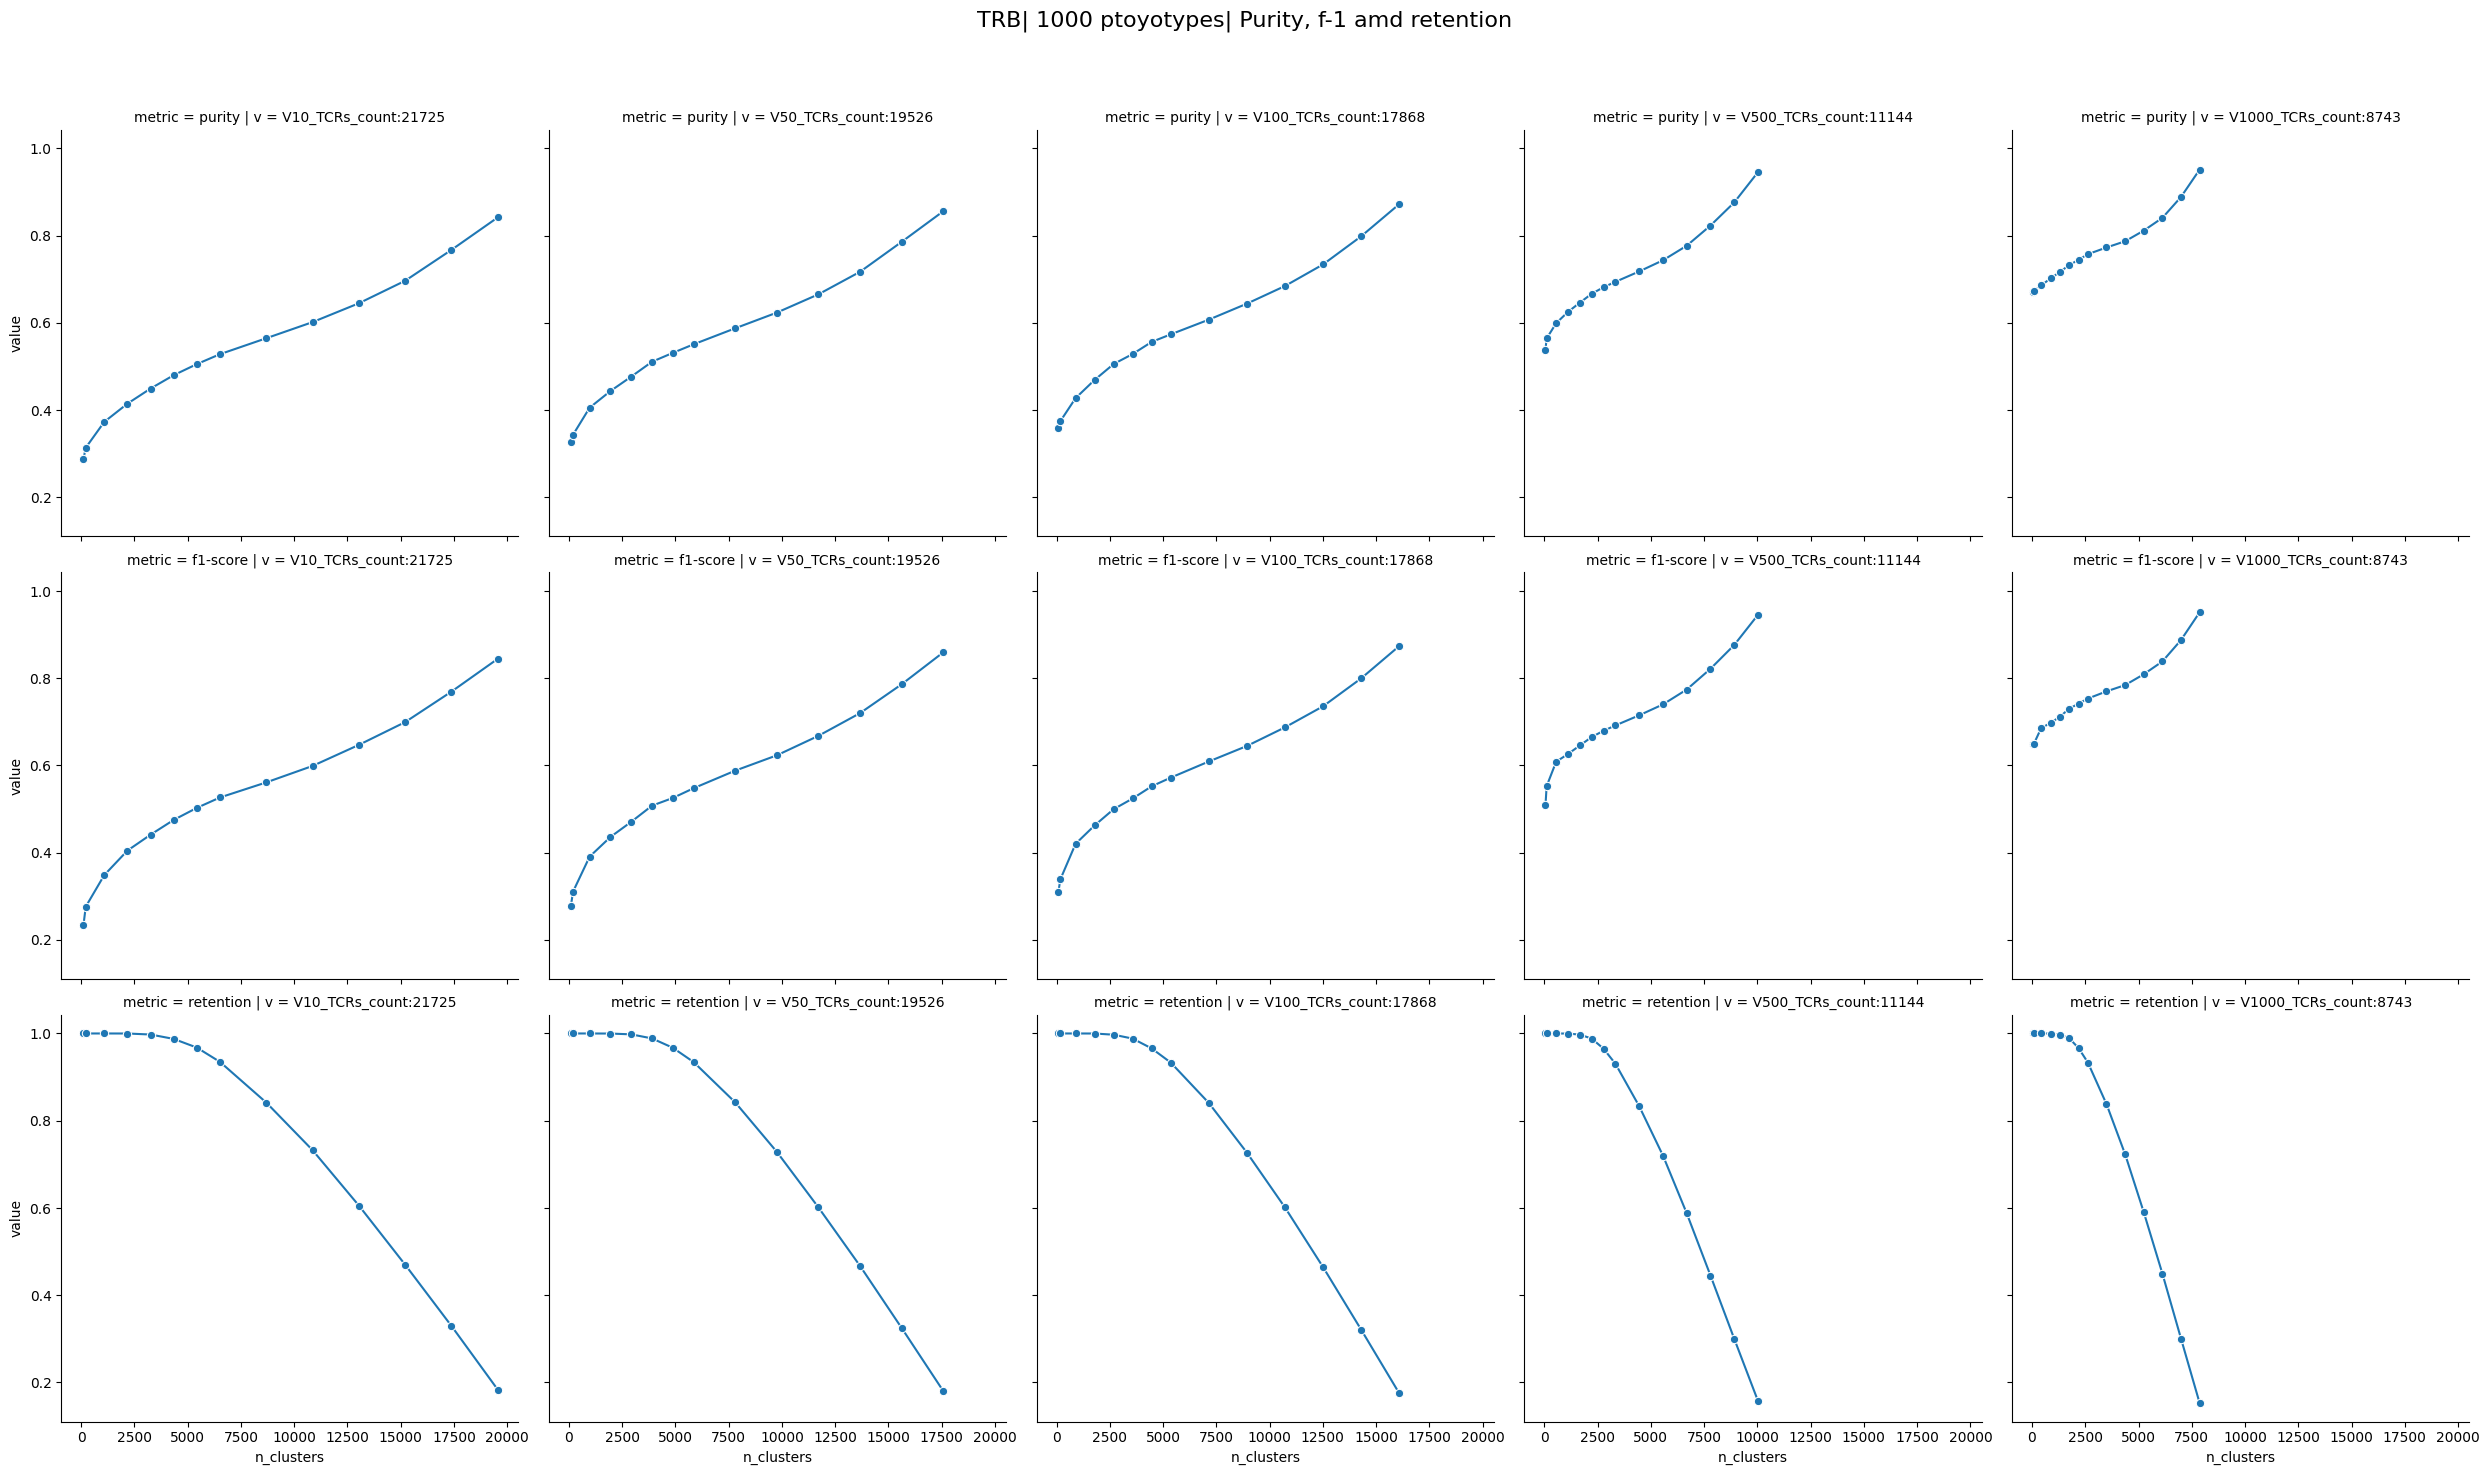

In [22]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [23]:
n_prototypes = 5000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


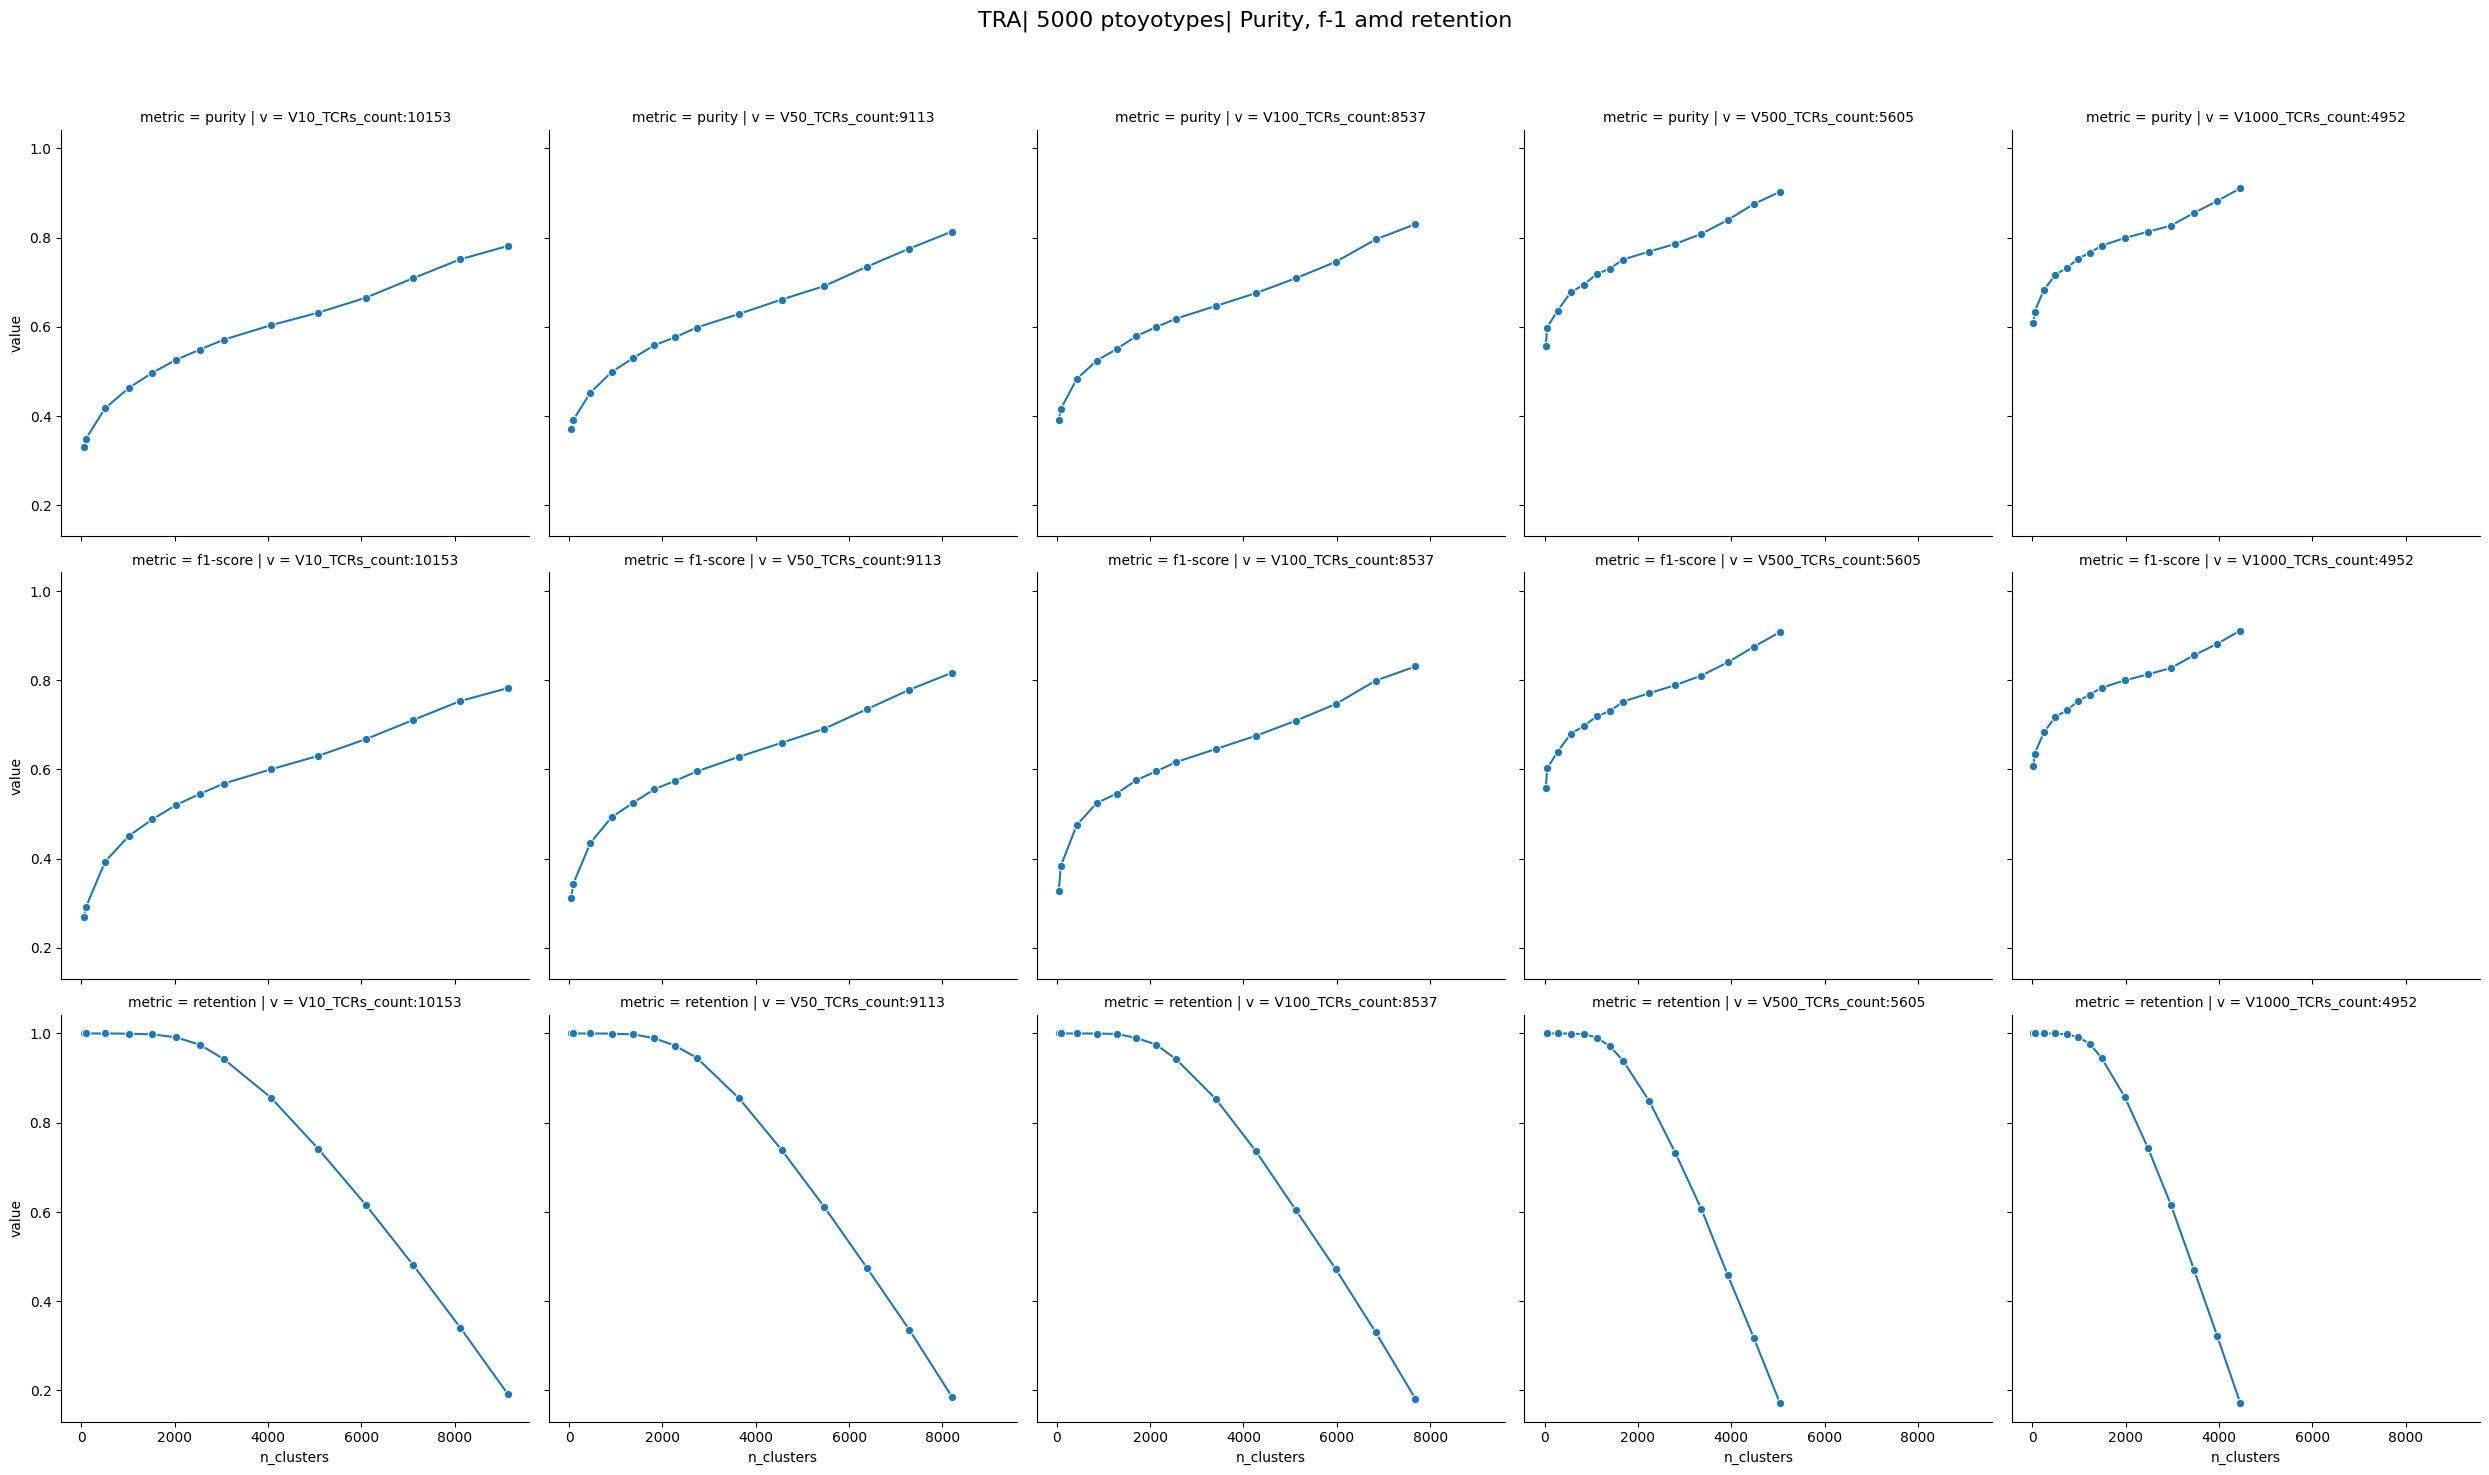

In [25]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


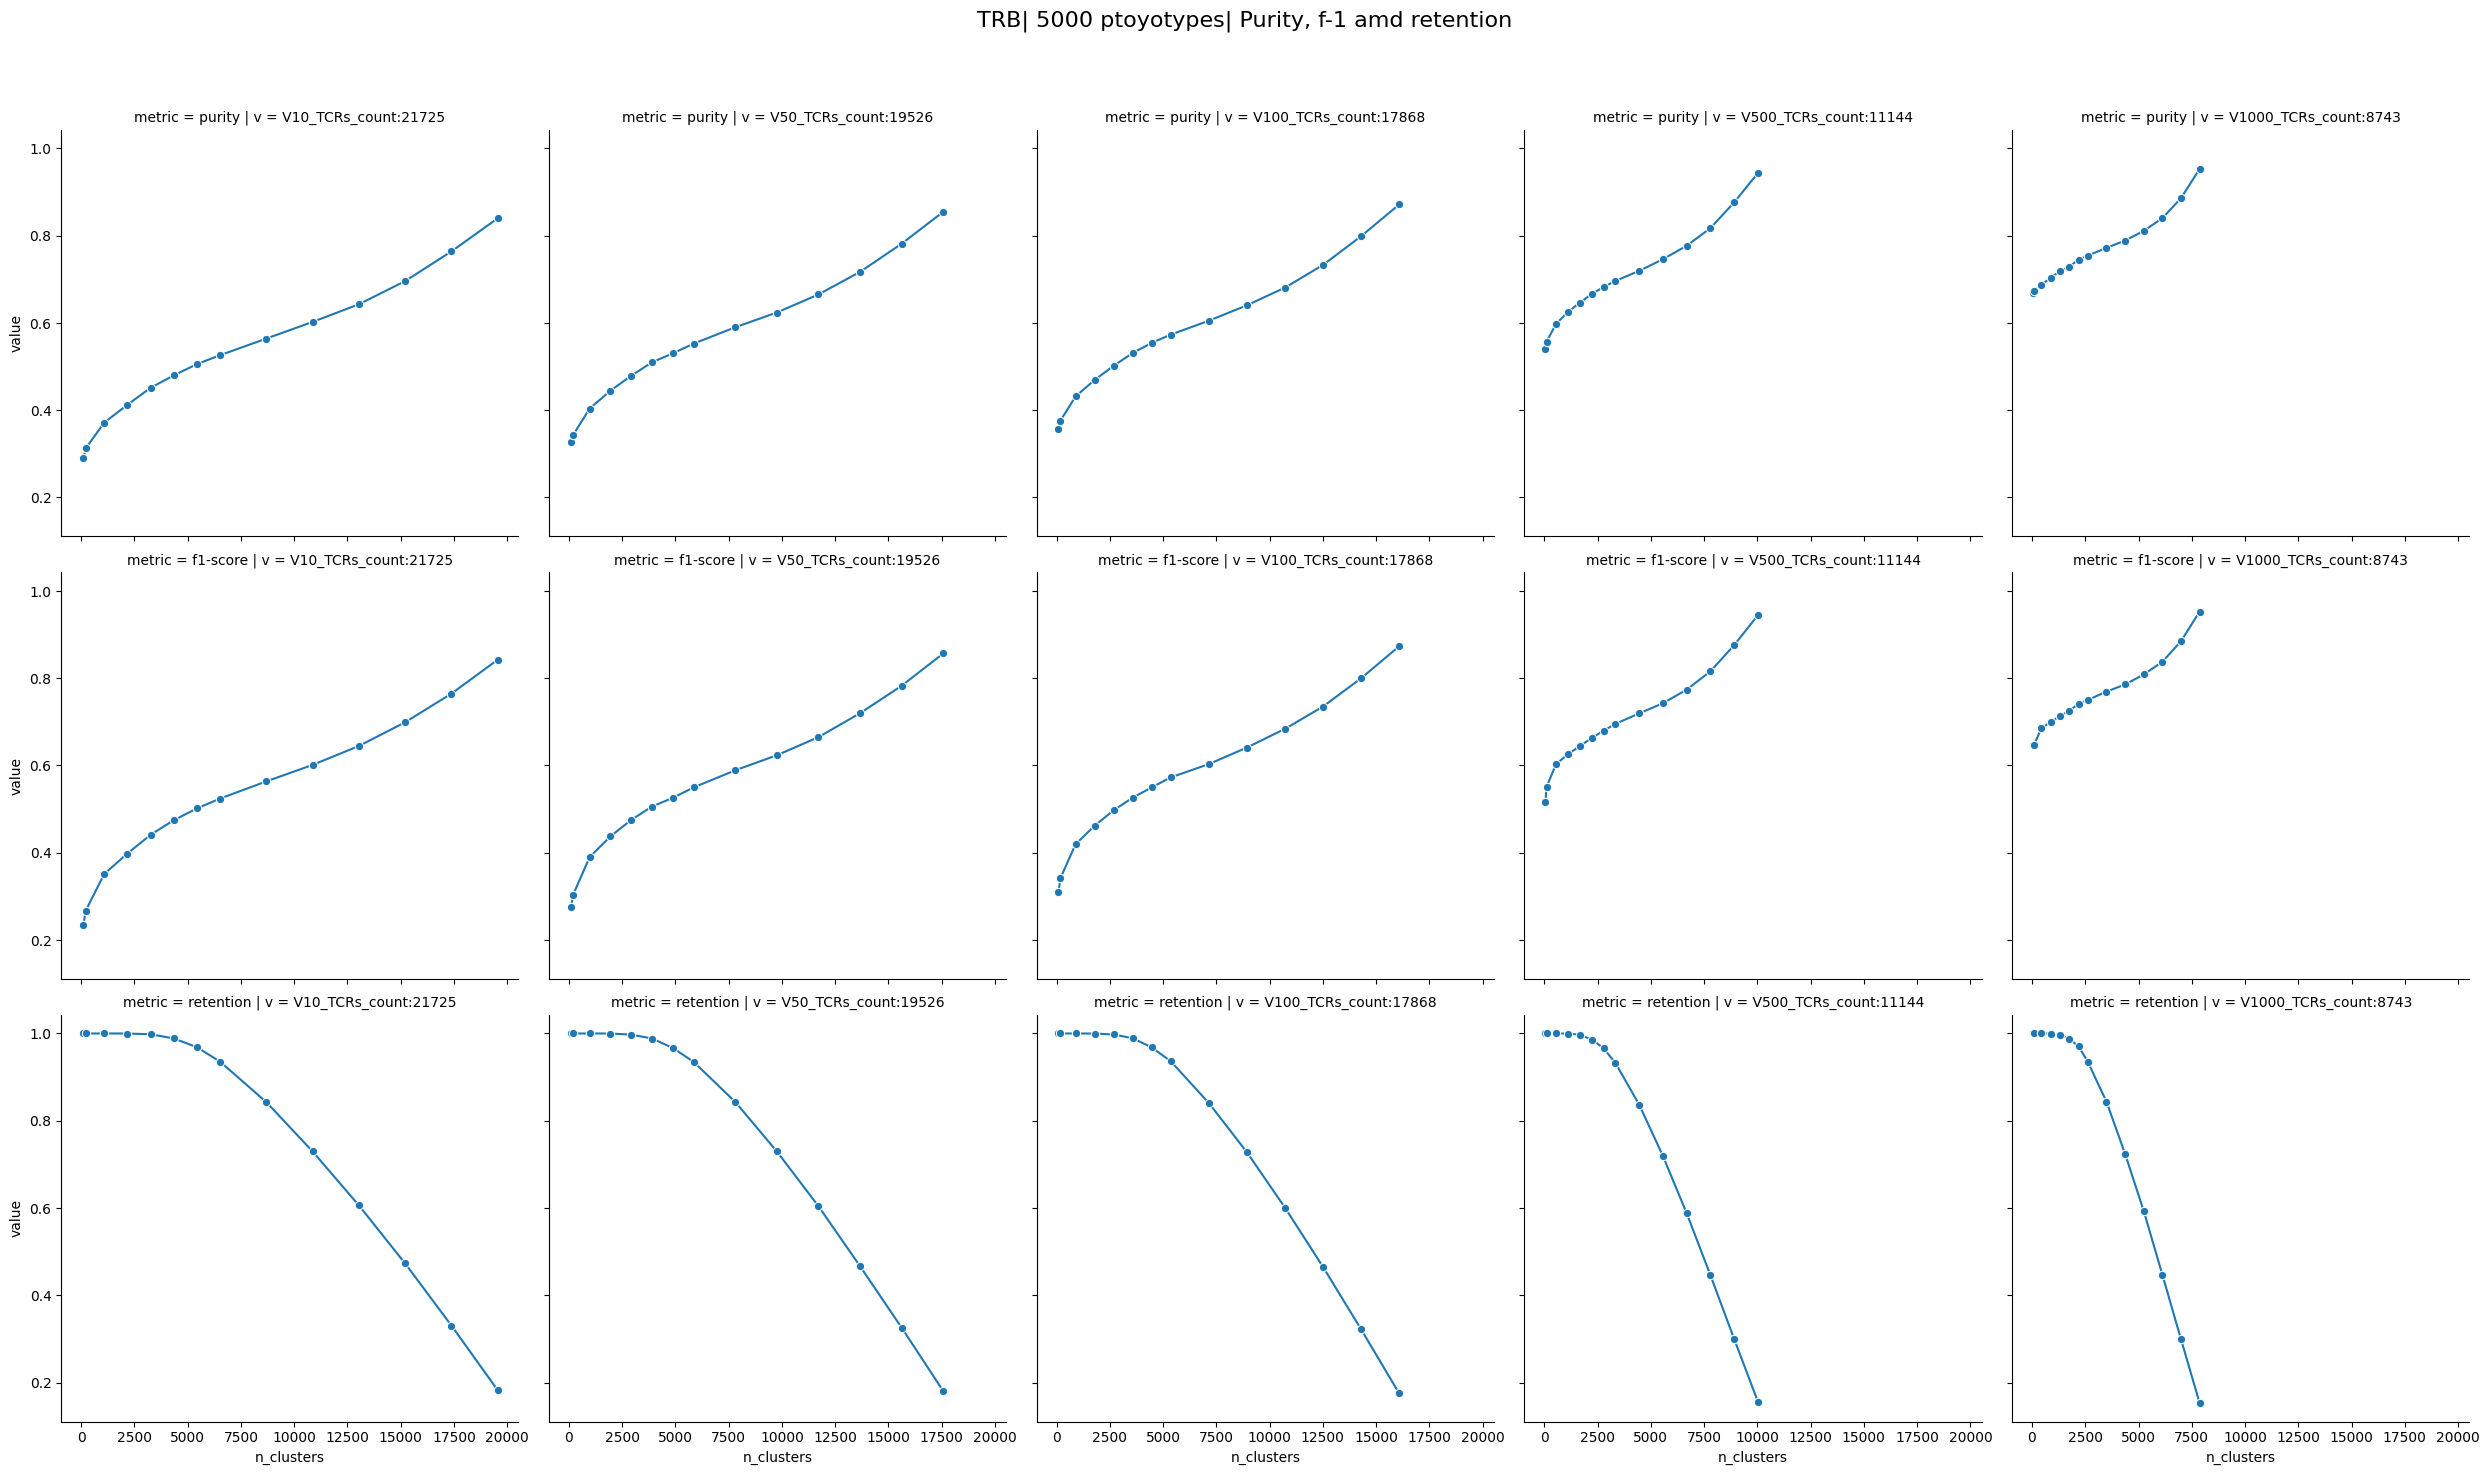

In [27]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

## compare prototypes

In [20]:
#prototypes_n = [3000]
prototypes_n = [100,150,300,500, 1000, 3000,5000]
samples_n = [10,50,100,500,1000]
#samples_n = [500,1000]

In [9]:
protos_metrics_tcremb = {}


In [10]:
method='dbscan'
protos_metrics_tcremb[method]={}

TCR-epitope paires count in V500 dataset: 5634
data/data_preped/VDJdb_data_TRA_V500.csv
{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9154228855721394
TCR-epitope paires count in V1000 dataset: 4971
data/data_preped/VDJdb_data_TRA_V1000.csv
{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9230769230769231


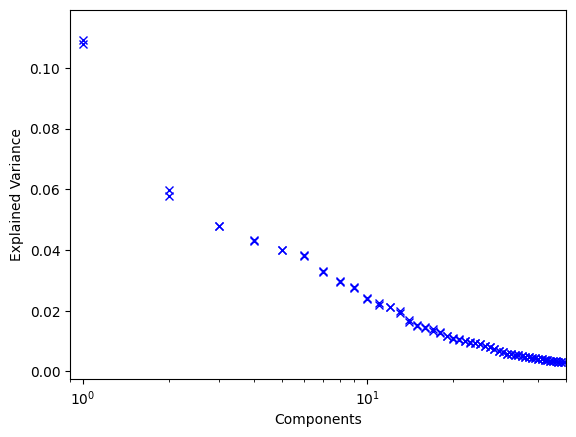

In [12]:


chain = 'TRA'
protos_metrics_tcremb[method][chain]={}
for i in samples_n:
    for j in prototypes_n:
        
        if j==3000:
            run_name = f'compare_V{i}'
        else:
            run_name = f'compare_V{i}_{j}'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
    
        data_len = len(tcremb.pca_clones[chain])
    
        dbscan = TCRemb.TCRemb_clustering('dbscan')
        dbscan.clstr(chain,tcremb, label, model='dbscan')
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        protos_metrics_tcremb[method][chain][f'V{i}_P{j}'] = metrics.get_clustermetrics(t, label)
        protos_metrics_tcremb[method][chain][f'V{i}_P{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'
        protos_metrics_tcremb[method][chain][f'V{i}_P{j}']['n_prototypes']=j
    


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


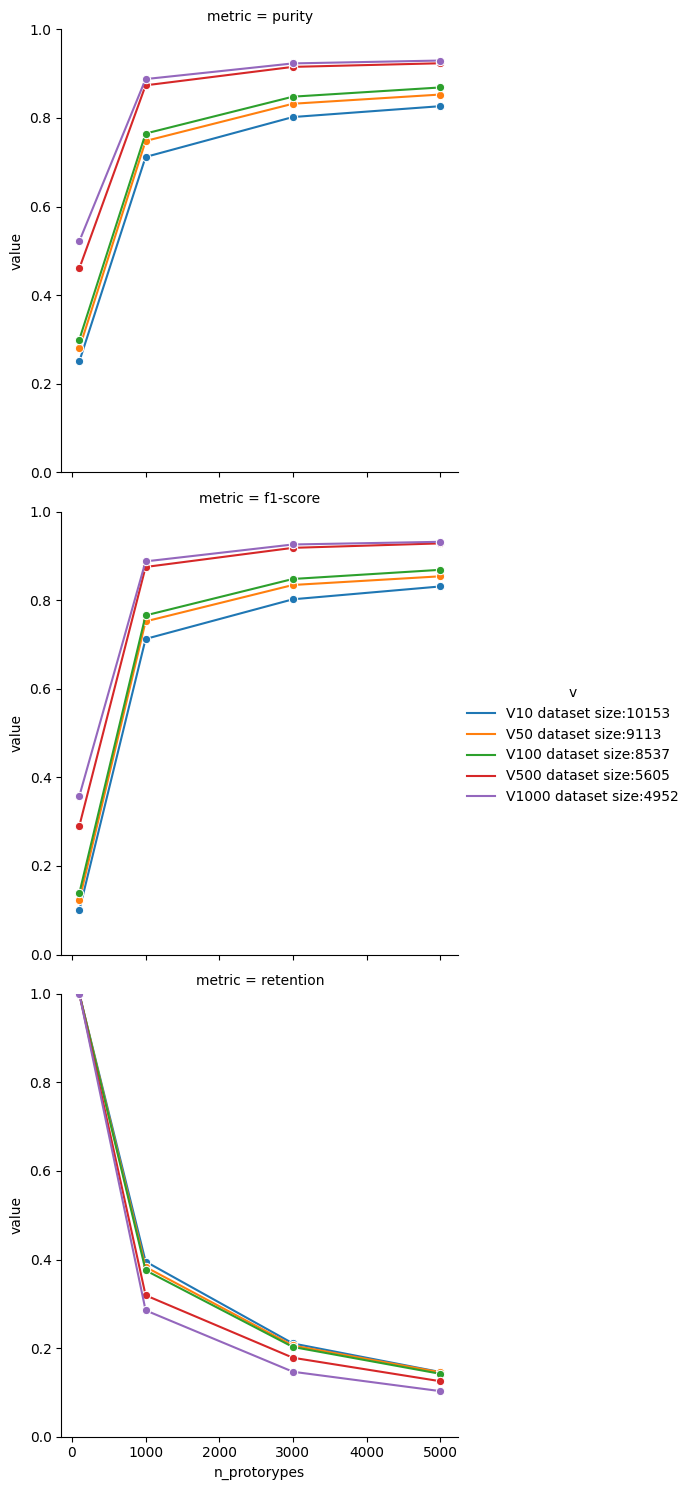

In [44]:
metrics_df = pd.DataFrame(protos_metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_prototypes','v']].melt(id_vars=['n_prototypes','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_prototypes', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.set(ylim=(0, 1))
g.set(ylim=(0, 1))

In [21]:

metrics_tcremb={}
#samples_n = [10,50,100,500,1000]
samples_n = [10,1000]
#prototypes_n = [100,150,300,500, 1000, 3000,5000]
prototypes_n = [100,3000]

In [22]:
method = 'dbscan'
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

TCR-epitope paires count in V10 dataset: 10352
data/data_preped/VDJdb_data_TRA_V10.csv
{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8283185840707965
purity:0.8283185840707965
purity:0.8283185840707965
purity:0.8283185840707965
purity:0.8315972222222222
purity:0.8360927152317881
purity:0.8380809595202399
purity:0.8401639344262295
purity:0.8370927318295739
purity:0.8473625140291807
purity:0.8398760330578512
purity:0.8413926499032882
purity:0.842327150084317
purity:0.8397185301016419
purity:0.8321479374110953
purity:0.8298545224541429
purity:0.8168115942028985
purity:0.8097713097713097
purity:0.8027459954233409
purity:0.7974369574204216
purity:0.7860411899313501
purity:0.7759543346414556
purity:0.7689457729875379
purity:0.7601895734597156
purity:0.7486486486486487
purity:0.7395626242544732
purity:0.7338973799126638
purity:0.7245430809399478
purity:0.7176997759522031
purity:0.7061465721040189
purity:0.6971326164874552
purity:0.688584279288927
purity:0.6818274943659086
purity:0.6712598425196851
TCR-epitope paires count in V1000 dataset: 4971
data/data_preped/VDJdb_data_TRA_V1000.csv
{'TRA': 'data/data_preped/ol

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9491525423728814
purity:0.9491525423728814
purity:0.9491525423728814
purity:0.9538461538461539
purity:0.9393939393939394
purity:0.9394812680115274
purity:0.9405594405594405
purity:0.9248878923766816
purity:0.9043478260869565
purity:0.8771186440677966
purity:0.8481012658227848
purity:0.7915110356536502
purity:0.7007144747287642
purity:0.6144875532630635
purity:0.5651720542231491
purity:0.5249290636400487
purity:0.5248083904800322
purity:0.5215638855300282
purity:0.5216602861172678
purity:0.5216602861172678
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
purity:0.5215551974214343
TCR-epitope paires count in V10 dataset: 10352
data/data_preped/VDJdb_data_TRA_V10.csv
{'TRA': 'data/data_preped/olg

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8283185840707965
purity:0.8283185840707965
purity:0.8283185840707965
purity:0.8283185840707965
purity:0.8315972222222222
purity:0.8360927152317881
purity:0.8380809595202399
purity:0.8401639344262295
purity:0.8370927318295739
purity:0.8473625140291807
purity:0.8398760330578512
purity:0.8420542635658915
purity:0.842327150084317
purity:0.8395931142410016
purity:0.8321428571428572
purity:0.8294377763739734
purity:0.8173356602675974
purity:0.809573361082206
purity:0.8027522935779816
purity:0.7969332780770825
purity:0.7861227601982462
purity:0.7760286225402504
purity:0.7684281386738472
purity:0.7601895734597156
purity:0.7488735355962751
purity:0.7397727272727272
purity:0.7338247338247338
purity:0.7248041775456919
purity:0.7171692000996761
purity:0.706480605487228
purity:0.6966166255881694
purity:0.6889839572192513
purity:0.6822372464658881
purity:0.6712598425196851
TCR-epitope paires count in V1000 dataset: 4971
data/data_preped/VDJdb_data_TRA_V1000.csv
{'TRA': 'data/data_preped/olg

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9491525423728814
purity:0.9491525423728814
purity:0.9491525423728814
purity:0.9491525423728814
purity:0.9505494505494505
purity:0.9526315789473684
purity:0.955
purity:0.9539170506912442
purity:0.9333333333333333
purity:0.9384057971014492
purity:0.9364548494983278
purity:0.9329073482428115
purity:0.9371859296482412
purity:0.9330254041570438
purity:0.9337606837606838
purity:0.9321100917431193
purity:0.9262981574539364
purity:0.9225037257824144
purity:0.9228650137741047
purity:0.9237983587338804
purity:0.920824295010846
purity:0.9197080291970803
purity:0.915603532875368
purity:0.9110907424381302
purity:0.906875543951262
purity:0.9025811823480433
purity:0.8996815286624203
purity:0.8962623951182304
purity:0.8903318903318903
purity:0.8878116343490304
purity:0.8830065359477124
purity:0.8813349814585909
purity:0.8775872264931993
purity:0.8758465011286681


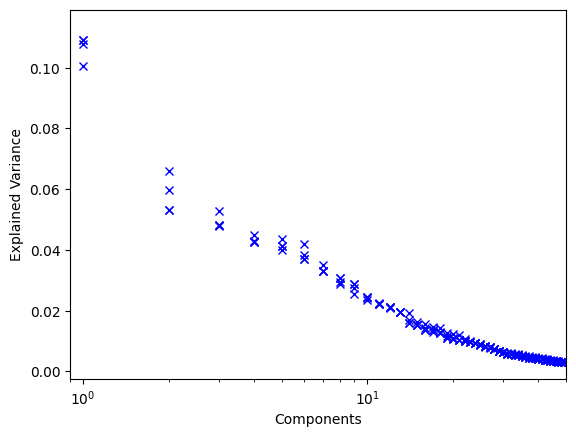

In [23]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for i in samples_n:
        if n_prototypes==3000:
            run_name = f'compare_V{i}'
        else:
            run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

TCR-epitope paires count in V10 dataset: 22057
data/data_preped/VDJdb_data_TRB_V10.csv
{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9485981308411215
purity:0.9485981308411215
purity:0.9485981308411215
purity:0.9488372093023256
purity:0.9490740740740741
purity:0.9495412844036697
purity:0.9506726457399103
purity:0.9507494646680942
purity:0.9285714285714286
purity:0.9283819628647215
purity:0.9311875693673696
purity:0.9209302325581395
purity:0.9208909370199693
purity:0.9207317073170732
purity:0.9189330543933054
purity:0.9126760563380282
purity:0.9079728583545378
purity:0.9039592316738534
purity:0.8988439306358381
purity:0.8924408924408924
purity:0.8863636363636364
purity:0.8771979580260919
purity:0.869348054679285
purity:0.8609189723320159
purity:0.8517488996988649
purity:0.8415324336090553
purity:0.8282745976777348
purity:0.8127045235803657
purity:0.796485565716335
purity:0.7832331329325317
purity:0.7651101046384507
purity:0.7504009330806239
purity:0.730176061143715
purity:0.7124031007751938
TCR-epitope paires count in V1000 dataset: 8763
data/data_preped/VDJdb_data_TRB_V1000.csv
{'TRA': 'data/data_preped/olg

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.974025974025974
purity:0.974025974025974
purity:0.974025974025974
purity:0.9753086419753086
purity:0.9858156028368794
purity:0.9851116625310173
purity:0.9718468468468469
purity:0.9663191659983962
purity:0.9512195121951219
purity:0.9112259276655706
purity:0.867561059511524
purity:0.8044179697195334
purity:0.7455740098558131
purity:0.7018651362984218
purity:0.5970686871196125
purity:0.5841908325537886
purity:0.5819267424503387
purity:0.5820656525220176
purity:0.5820946718499885
purity:0.5820946718499885
purity:0.5820759030635574
purity:0.5820093724997143
purity:0.5820093724997143
purity:0.5820093724997143
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
purity:0.5340038861584181
TCR-epitope paires count in V10 dataset: 22057
data/data_preped/VDJdb_data_TRB_V10.csv
{'TRA': 'data/data_preped/olga_hu

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9485981308411215
purity:0.9485981308411215
purity:0.9485981308411215
purity:0.9488372093023256
purity:0.9490740740740741
purity:0.9495412844036697
purity:0.9506726457399103
purity:0.9507494646680942
purity:0.9285714285714286
purity:0.9283819628647215
purity:0.9293598233995585
purity:0.9208566108007449
purity:0.9207082371054658
purity:0.9207317073170732
purity:0.9193294918805658
purity:0.9136385087305333
purity:0.9078164825828378
purity:0.9038461538461539
purity:0.8991323210412148
purity:0.8924050632911392
purity:0.886052303860523
purity:0.8771979580260919
purity:0.8697025533035009
purity:0.861097380128522
purity:0.8518776077885952
purity:0.8418189730200174
purity:0.8282333741330069
purity:0.8128249566724437
purity:0.7968048824268533
purity:0.7831023543162464
purity:0.7649172133708216
purity:0.74981765134938
purity:0.730327868852459
purity:0.7120703024037219
TCR-epitope paires count in V1000 dataset: 8763
data/data_preped/VDJdb_data_TRB_V1000.csv
{'TRA': 'data/data_preped/olga_

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.974025974025974
purity:0.974025974025974
purity:0.974025974025974
purity:0.974025974025974
purity:0.9743589743589743
purity:0.9746835443037974
purity:0.975
purity:0.9766081871345029
purity:0.9826839826839827
purity:0.9801980198019802
purity:0.9815789473684211
purity:0.9810874704491725
purity:0.9766454352441614
purity:0.9774774774774775
purity:0.9783783783783784
purity:0.9746682750301568
purity:0.9741379310344828
purity:0.9708835341365462
purity:0.9685414680648237
purity:0.9648014440433214
purity:0.9637305699481865
purity:0.9599358974358975
purity:0.9578313253012049
purity:0.9525179856115108
purity:0.9519890260631001
purity:0.9471989697359948
purity:0.9420825631546519
purity:0.9344262295081968
purity:0.9261111111111111
purity:0.9190871369294605
purity:0.9130434782608695
purity:0.9069985908877407
purity:0.9008410801239487
purity:0.8968855218855218


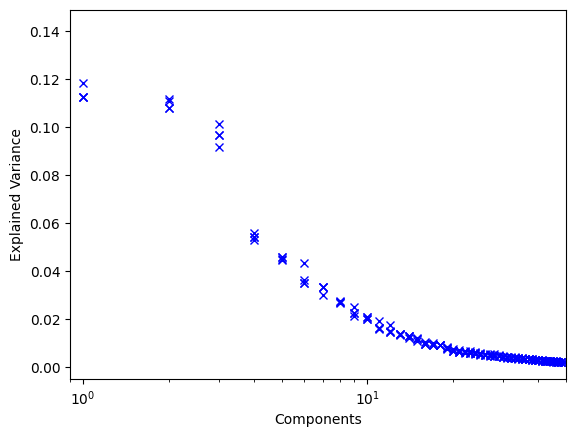

In [26]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for i in samples_n:
        if n_prototypes==3000:
            run_name = f'compare_V{i}'
        else:
            run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [12]:
print(sns.color_palette("Set2").as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [15]:
samples_n

[10, 50, 100, 500, 1000]

In [ ]:
color_map = {10:'#66c2a5',50:'#fc8d62',100:'#8da0cb',500:'#e78ac3'}

In [17]:
metrics_df['n_prototypes'].drop_duplicates()

V10_P100_e3      100
V10_P150_e3      150
V10_P300_e3      300
V10_P500_e3      500
V10_P1000_e3    1000
V10_P3000_e3    3000
V10_P5000_e3    5000
Name: n_prototypes, dtype: object

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


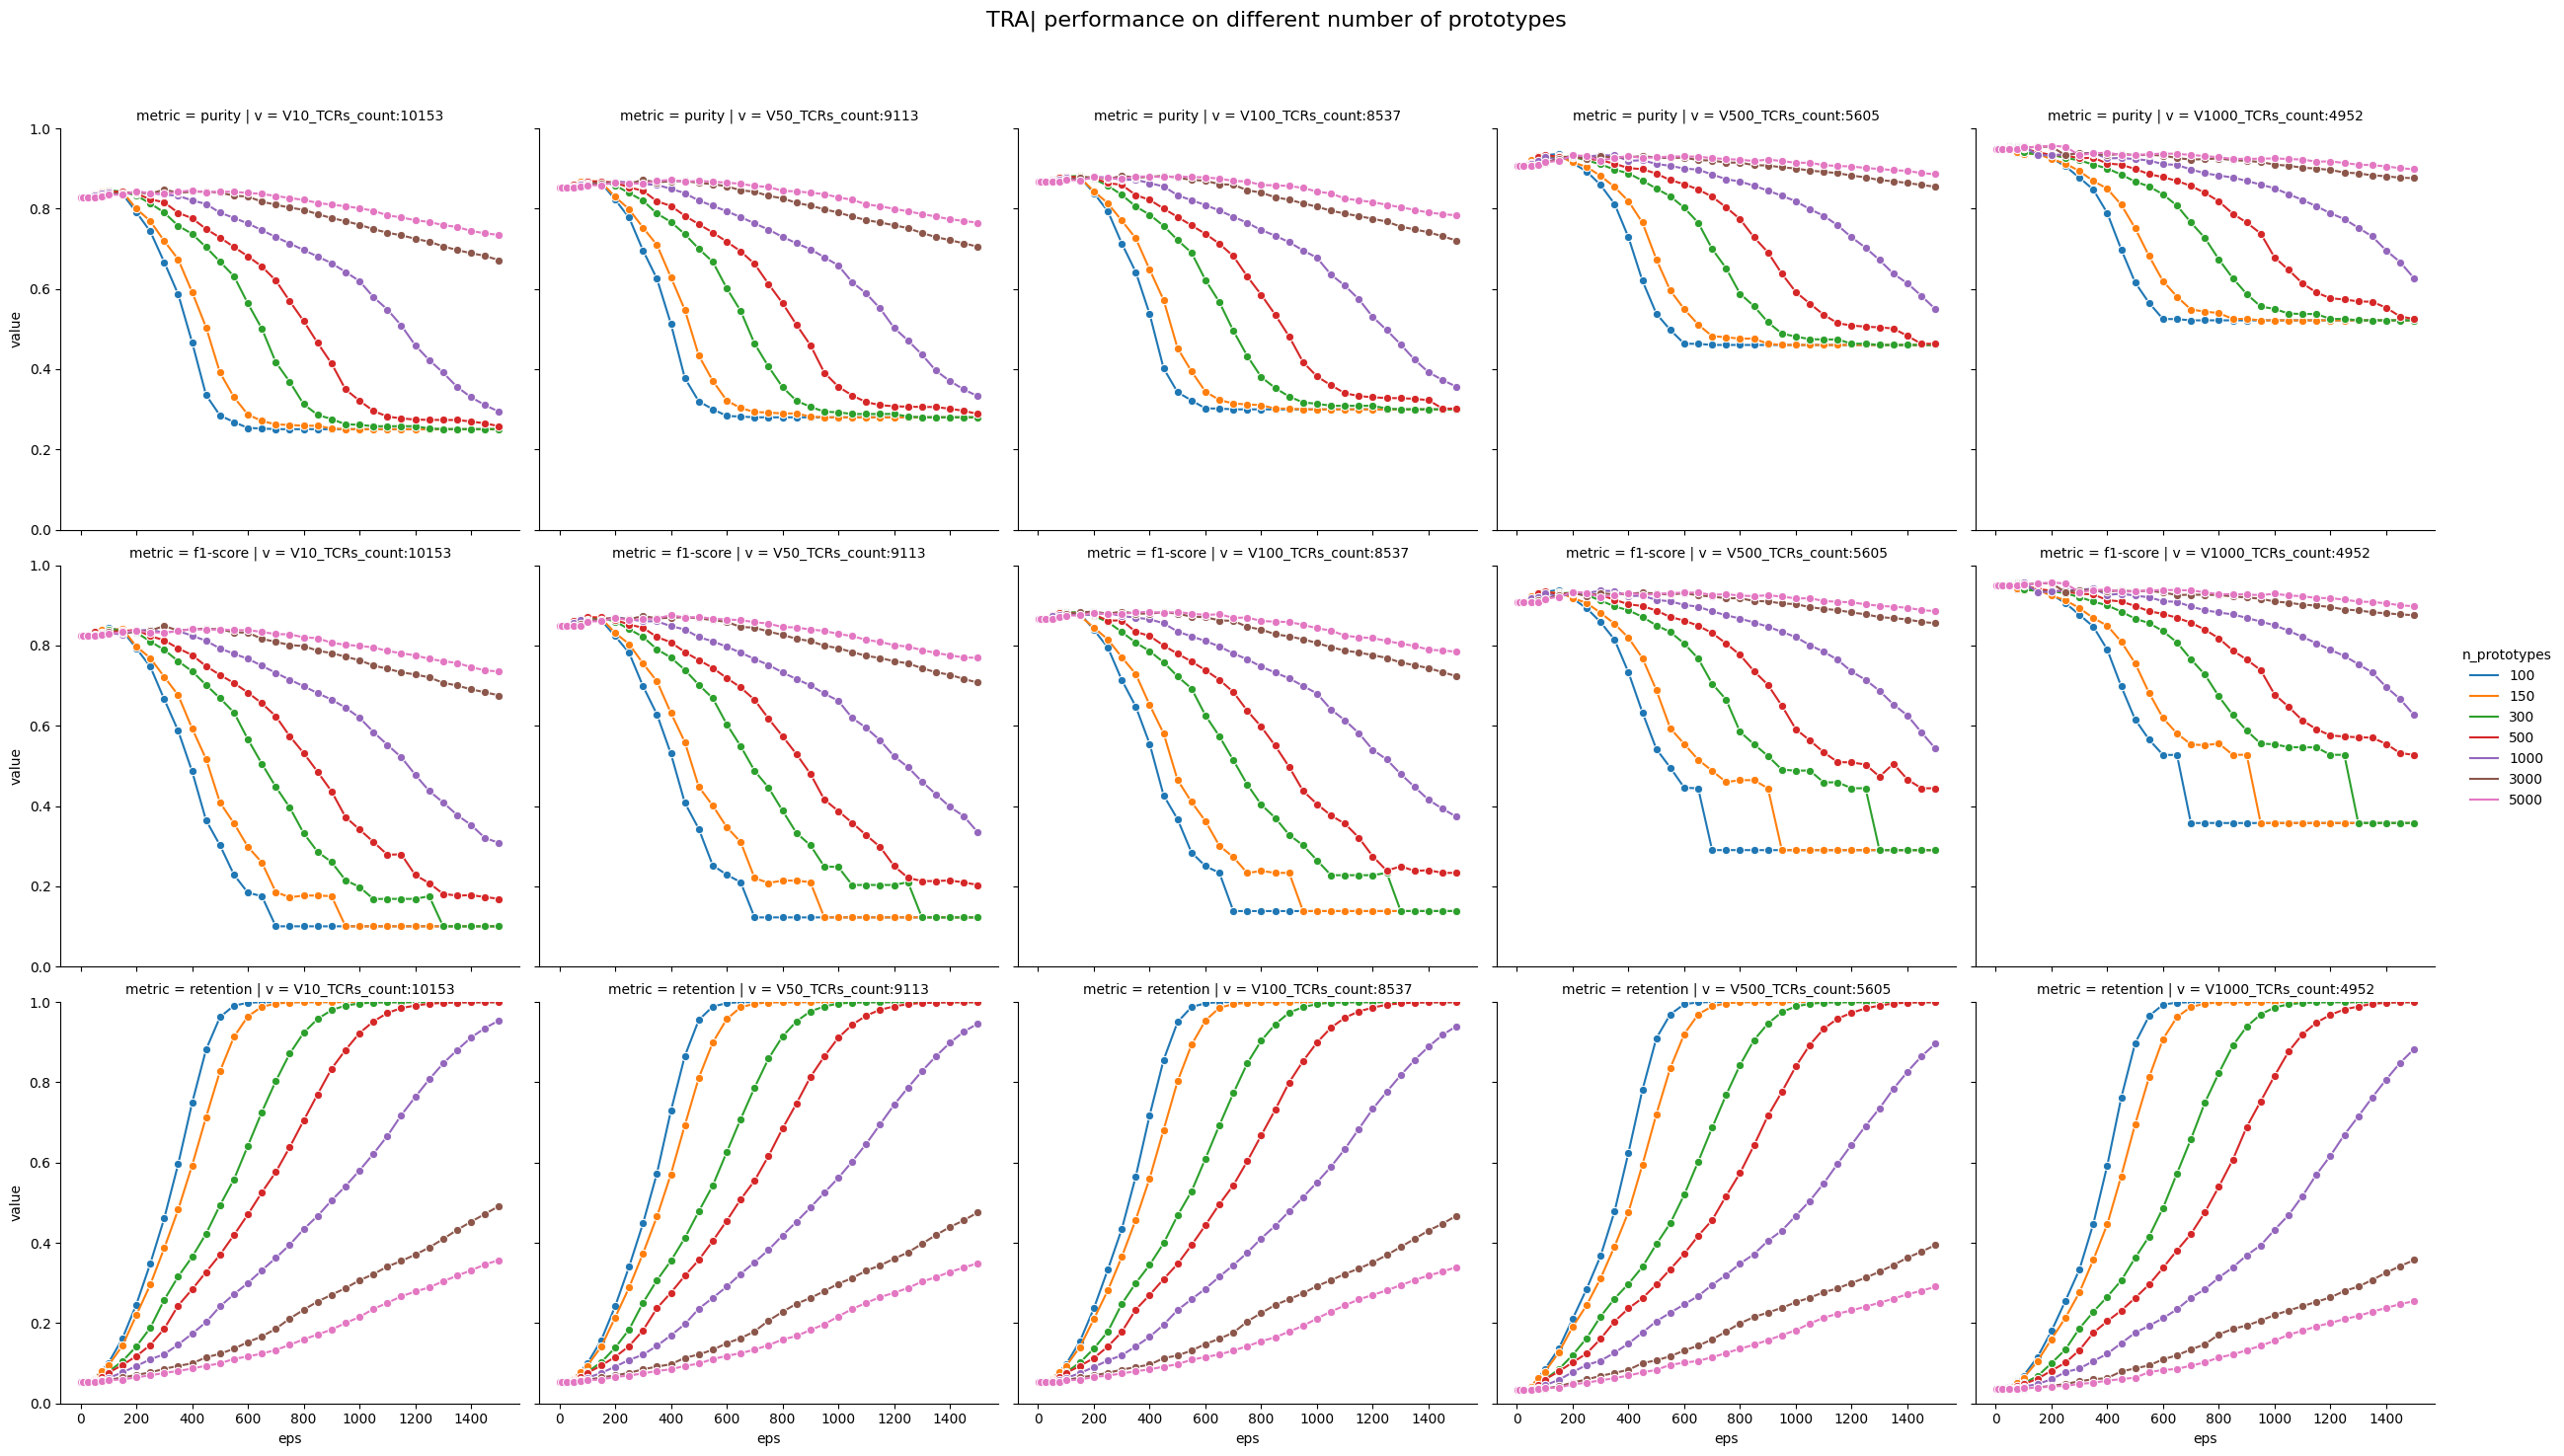

In [24]:
chain='TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_prototypes_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


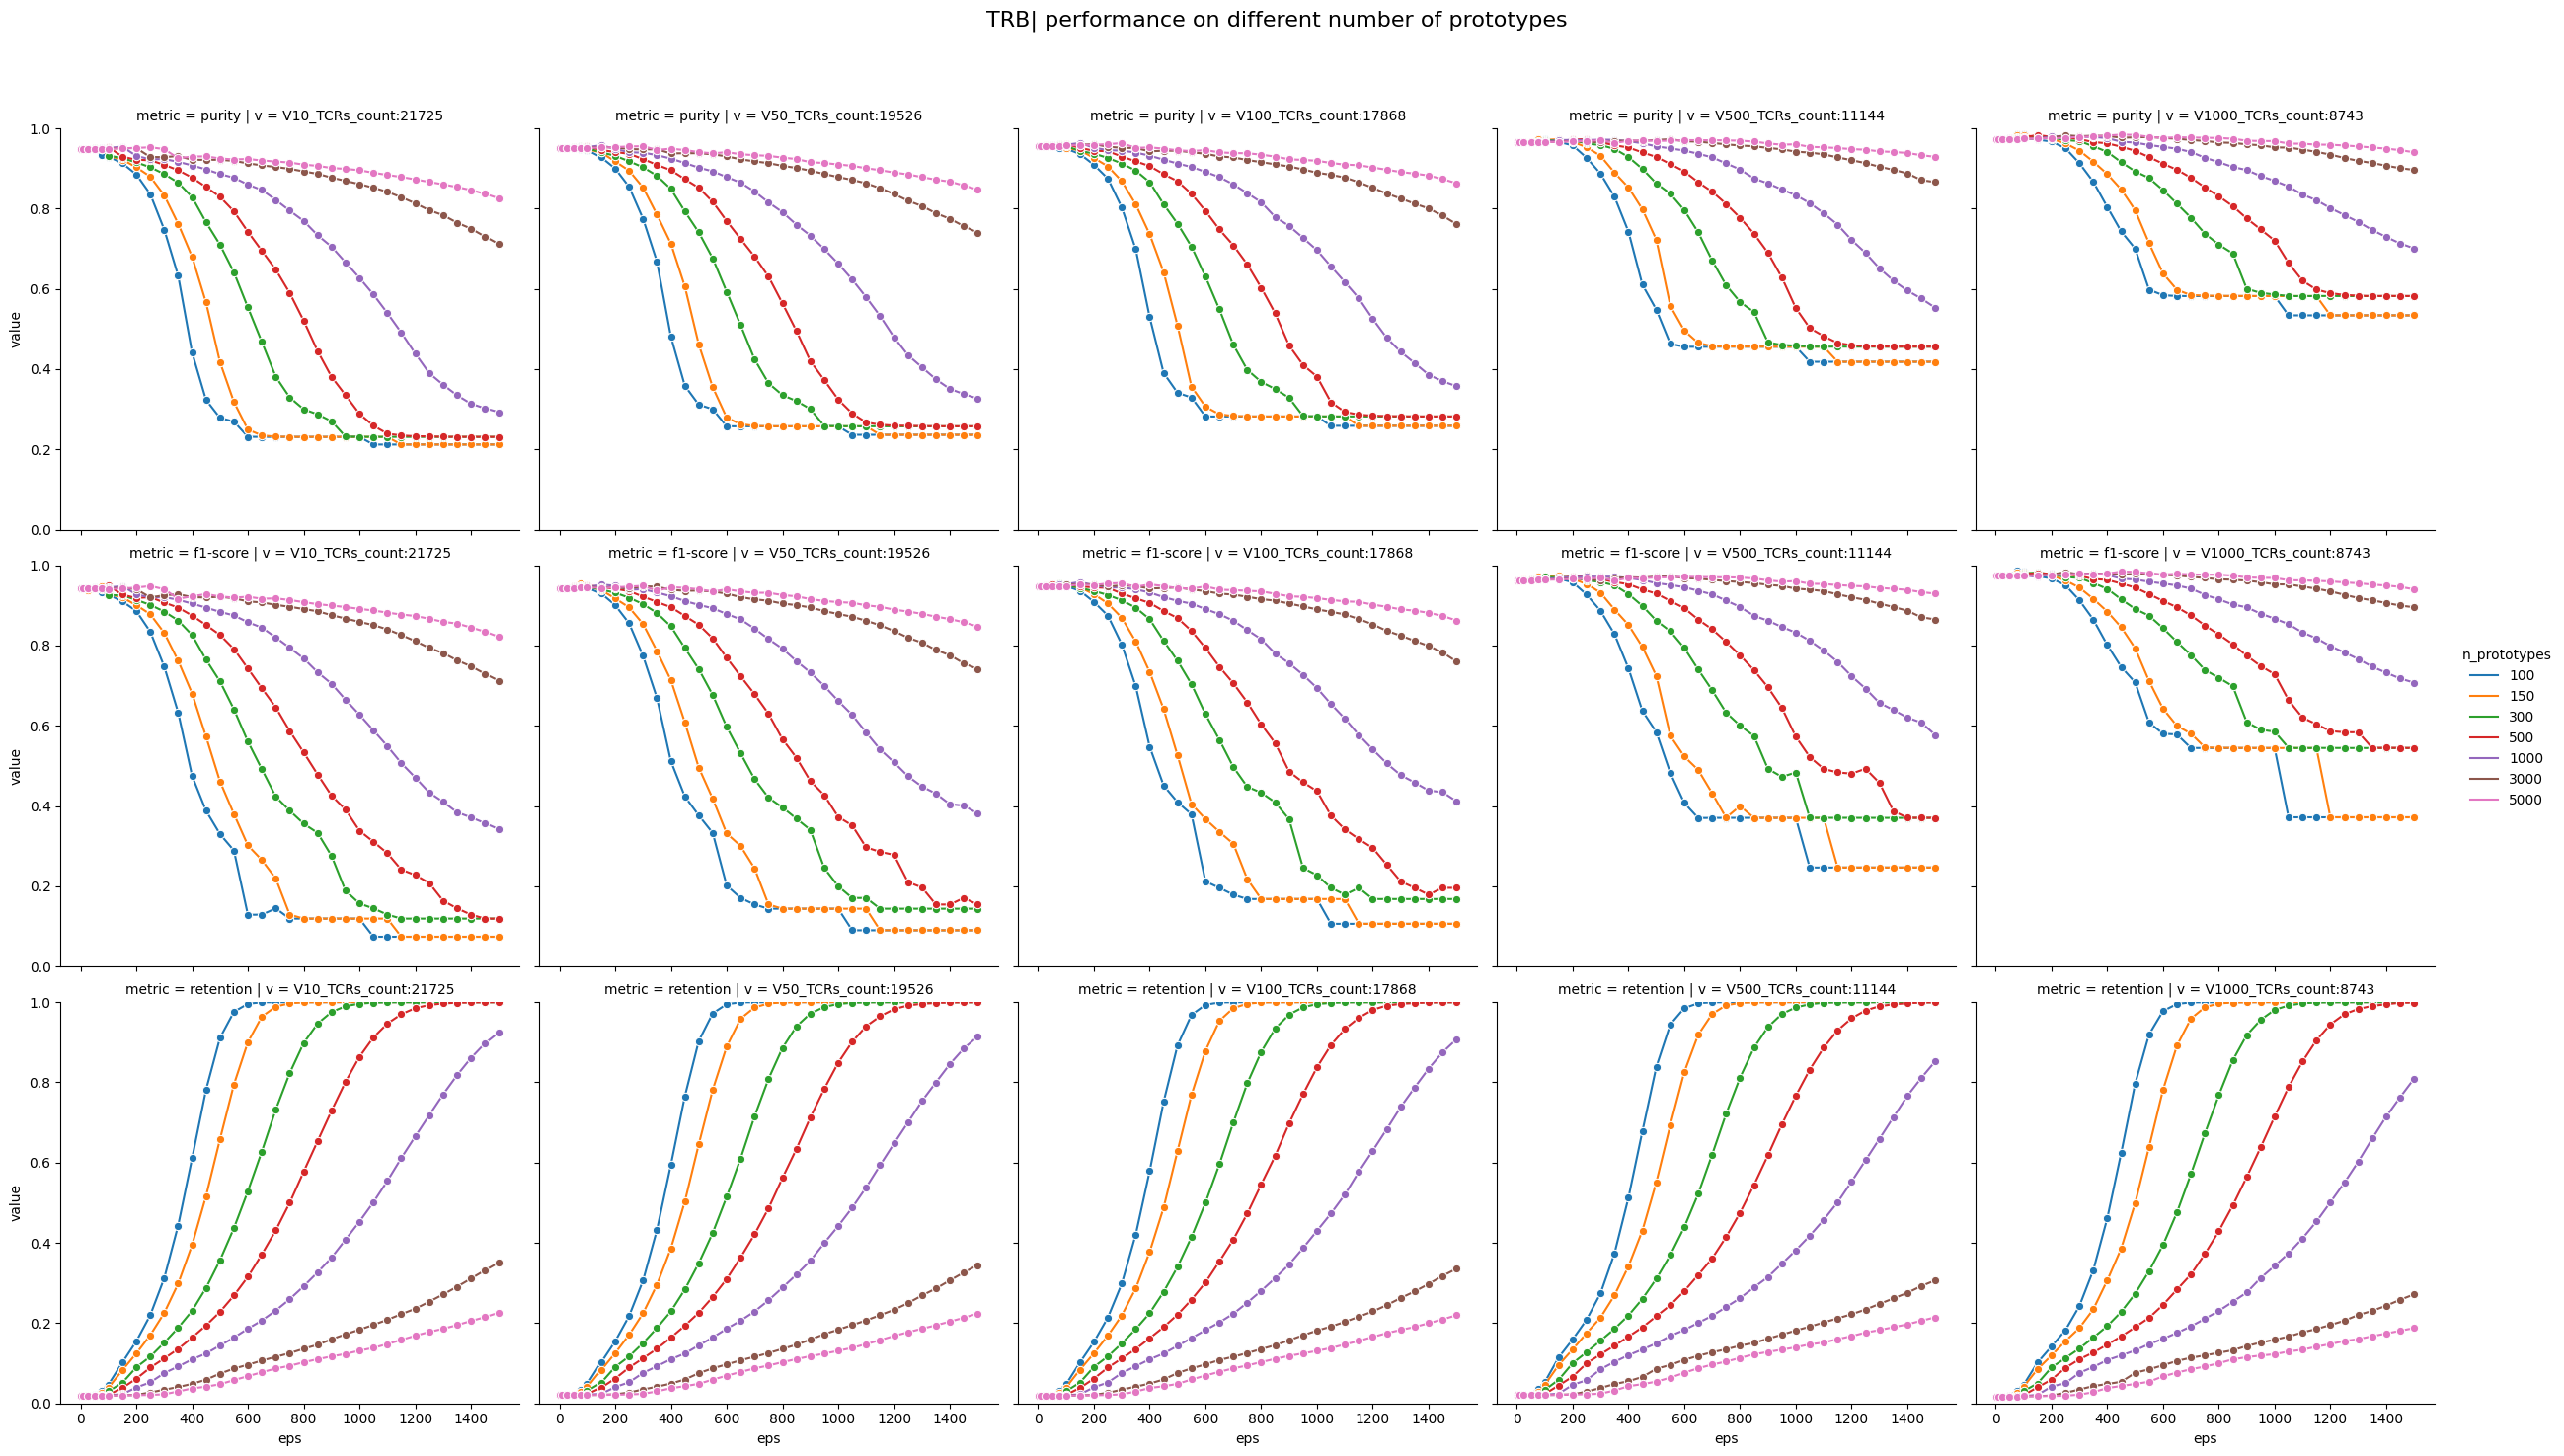

In [25]:
chain='TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [26]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T

In [29]:
metrics_df[(metrics_df['n_prototypes']==100)&(metrics_df['eps']==750)]

purity retention consistency       ami  accuracy precision  \
V10_P100_e750    0.231076  0.999909    0.003147  0.031215  0.004562   0.08045   
V50_P100_e750    0.257536  0.999899    0.008225  0.033099  0.005082  0.099912   
V100_P100_e750   0.282043  0.999889    0.013549  0.035477  0.005563  0.119725   
V500_P100_e750   0.455946  0.999821    0.082736  0.048124  0.074318  0.311905   
V1000_P100_e750  0.582095  0.999657    0.166362  0.053519  0.333108  0.511424   

                   recall  f1-score support mean_clustsize n_prototypes  eps  \
V10_P100_e750    0.231076  0.119349   22036         4407.2          100  750   
V50_P100_e750    0.257536  0.143971   19772         3954.4          100  750   
V100_P100_e750   0.282043  0.168095   18054         3610.8          100  750   
V500_P100_e750   0.455946  0.370415   11168         2233.6          100  750   
V1000_P100_e750  0.582095  0.544475    8746         1749.2          100  750   

                                     v  
V10_P100_e750     V10_TCRs_count:21725  
V50_P100_e750     V50_TCRs_count:19526  
V100_P100_e750   V100_TCRs_count:17868  
V500_P100_e750   V500_TCRs_count:11144  
V1000_P100_e750  V1000_TCRs_count:8743

In [28]:
metrics_df[(metrics_df['n_prototypes']==3000)&(metrics_df['eps']==750)]

purity retention consistency       ami  accuracy  \
V10_P3000_e750    0.899023  0.125374    0.001283  0.850472  0.003967   
V50_P3000_e750    0.913341  0.125468    0.001911  0.855586  0.004418   
V100_P3000_e750   0.921006  0.125498    0.002659  0.854885  0.004835   
V500_P3000_e750   0.960133  0.134736    0.012846  0.856825  0.180793   
V1000_P3000_e750  0.968481  0.119671    0.028335  0.787893  0.250983   

                 precision    recall  f1-score support mean_clustsize  \
V10_P3000_e750    0.893651  0.899023  0.896329    2763       3.216531   
V50_P3000_e750    0.909437  0.913341  0.911385    2481       3.273087   
V100_P3000_e750    0.92123  0.921006  0.921118    2266        3.34712   
V500_P3000_e750   0.960617  0.960133  0.960375    1505       3.753117   
V1000_P3000_e750  0.967991  0.968481  0.968236    1047       3.863469   

                 n_prototypes  eps                      v  
V10_P3000_e750           3000  750   V10_TCRs_count:21725  
V50_P3000_e750           3000  750   V50_TCRs_count:19526  
V100_P3000_e750          3000  750  V100_TCRs_count:17868  
V500_P3000_e750          3000  750  V500_TCRs_count:11144  
V1000_P3000_e750         3000  750  V1000_TCRs_count:8743

## check comparison

In [25]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df[(metrics_df['n_prototypes']==1000)&(metrics_df['eps']==750)]

Empty DataFrame
Columns: [purity, retention, consistency, ami, accuracy, precision, recall, f1-score, support, mean_clustsize, n_prototypes, eps, v]
Index: []

In [27]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df[(metrics_df['n_prototypes']==100)&(metrics_df['eps']==750)]

purity retention consistency       ami  accuracy precision  \
V10_P100_e750    0.898844  0.125601     0.00128  0.850632  0.003961  0.892681   
V1000_P100_e750  0.582095  0.999657    0.166362  0.053519  0.333108  0.511424   

                   recall  f1-score support mean_clustsize n_prototypes  eps  \
V10_P100_e750    0.898844  0.895752    2768       3.218605          100  750   
V1000_P100_e750  0.582095  0.544475    8746         1749.2          100  750   

                                     v  
V10_P100_e750     V10_TCRs_count:21725  
V1000_P100_e750  V1000_TCRs_count:8743

In [24]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df[(metrics_df['n_prototypes']==100)&(metrics_df['eps']==750)]

purity retention consistency       ami  accuracy precision  \
V10_P100_e750    0.802746  0.211295    0.002205  0.671266  0.001826  0.801173   
V1000_P100_e750   0.52166  0.999799    0.432198       0.0  0.249531  0.272129   

                   recall  f1-score support mean_clustsize n_prototypes  eps  \
V10_P100_e750    0.802746  0.801959    2185       3.189781          100  750   
V1000_P100_e750   0.52166  0.357674    4963         2481.5          100  750   

                                     v  
V10_P100_e750     V10_TCRs_count:10153  
V1000_P100_e750  V1000_TCRs_count:4952

In [11]:
## 100 prototypes
i = 10
j = 100
res_clstr_100={}
metrics_100={}
run_name = f'compare_V{i}_{j}'
proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}

{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASNTGTASKLTF, κ1 CAVLLEYGNKLVF, κ2 CVVSAIMDSNYQLIW, κ3 CLVGATTDSWGKLQF, κ4 CLVGPLSGGYNKLIF, κ5 CAGAVGNQFYF, κ6 CAVNDNDKIIF, κ7 CALSDPTSGGYQKVTF, κ8 CAEAEGGGSQGNLIF, κ9 CAVRATGTASKLTF]
(10153, 8854)
386.7073278427124


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8031135531135531
{'purity': 0.8031135531135531, 'retention': 0.21119814331302583, 'consistency': 0.0020830108858277867, 'ami': 0.6721831830463978, 'accuracy': 0.0018264702330636397, 'precision': 0.8025039025006204, 'recall': 0.8031135531135525, 'f1-score': 0.8028086120653609, 'support': 2184, 'mean_clustsize': 3.1883211678832115}


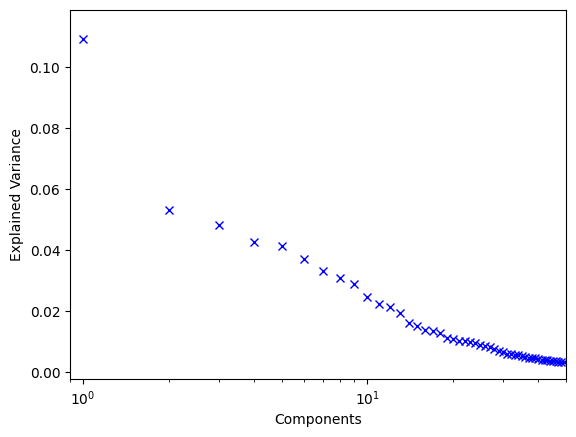

In [12]:

chain='TRA'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_100_a = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_100_a.tcremb_clonotypes(chain)
tcremb_100_a.tcremb_dists_count(chain)
tcremb_100_a.tcremb_dists(chain)
tcremb_100_a.tcremb_pca(chain)
tcremb_100_a.tcremb_tsne(chain)


dbscan_100 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_100.clstr(chain,tcremb_100_a, label, model=model)

res_clstr_100[chain] = tcremb_100_a.annot[chain][[tcremb_100_a.annotation_id,label]].merge(dbscan_100.clstr_labels[chain],how='left')
metrics_100[chain] = metrics.get_clustermetrics(res_clstr_100[chain], label)

print(metrics_100[chain])

{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]
(21725, 9001)
909.2553215026855


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8989534464092386
{'purity': 0.8989534464092386, 'retention': 0.1257373627370905, 'consistency': 0.0012789606640202097, 'ami': 0.8514917000602702, 'accuracy': 0.0039553602091882975, 'precision': 0.8901783734434399, 'recall': 0.8989534464092395, 'f1-score': 0.8945443905769266, 'support': 2771, 'mean_clustsize': 3.2183507549361208}


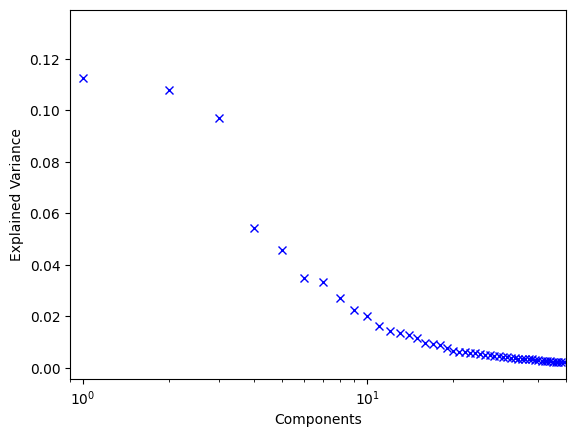

In [13]:

chain='TRB'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_100_b = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_100_b.tcremb_clonotypes(chain)
tcremb_100_b.tcremb_dists_count(chain)
tcremb_100_b.tcremb_dists(chain)
tcremb_100_b.tcremb_pca(chain)
tcremb_100_b.tcremb_tsne(chain)


dbscan_100 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_100.clstr(chain,tcremb_100_b, label, model=model)

res_clstr_100[chain] = tcremb_100_b.annot[chain][[tcremb_100_b.annotation_id,label]].merge(dbscan_100.clstr_labels[chain],how='left')
metrics_100[chain] = metrics.get_clustermetrics(res_clstr_100[chain], label)

print(metrics_100[chain])

In [14]:
## 100 prototypes
i = 10
j = 3000
metrics_3000={}
res_clstr_3000={}
run_name = f'compare_V{i}_{j}'
proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}

{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASNTGTASKLTF, κ1 CAVLLEYGNKLVF, κ2 CVVSAIMDSNYQLIW, κ3 CLVGATTDSWGKLQF, κ4 CLVGPLSGGYNKLIF, κ5 CAGAVGNQFYF, κ6 CAVNDNDKIIF, κ7 CALSDPTSGGYQKVTF, κ8 CAEAEGGGSQGNLIF, κ9 CAVRATGTASKLTF]
(10153, 8854)
374.2479314804077


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8021927820922796
{'purity': 0.8021927820922796, 'retention': 0.2116816555458853, 'consistency': 0.002078252980652301, 'ami': 0.6719512787218926, 'accuracy': 0.0018239793176606067, 'precision': 0.8017593083653567, 'recall': 0.80219278209228, 'f1-score': 0.8019759866549142, 'support': 2189, 'mean_clustsize': 3.1863173216885006}


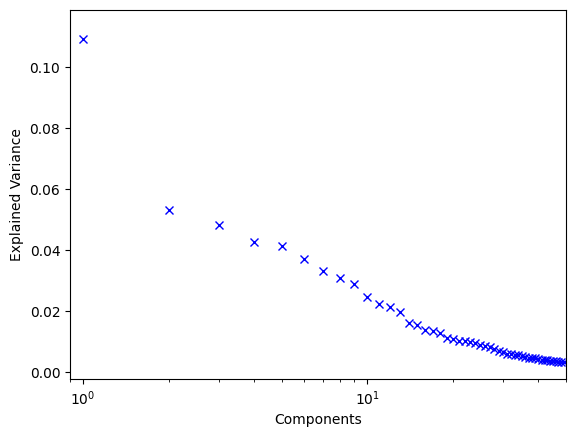

In [15]:

chain='TRA'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_3000_a = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_3000_a.tcremb_clonotypes(chain)
tcremb_3000_a.tcremb_dists_count(chain)
tcremb_3000_a.tcremb_dists(chain)
tcremb_3000_a.tcremb_pca(chain)
tcremb_3000_a.tcremb_tsne(chain)


dbscan_3000 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_3000.clstr(chain,tcremb_3000_a, label, model=model)

res_clstr_3000[chain] = tcremb_3000_a.annot[chain][[tcremb_3000_a.annotation_id,label]].merge(dbscan_3000.clstr_labels[chain],how='left')
metrics_3000[chain] = metrics.get_clustermetrics(res_clstr_3000[chain], label)

print(metrics_3000[chain])



{'TRA': 'data/data_preped/olga_humanTRA.txt', 'TRB': 'data/data_preped/olga_humanTRB.txt'}
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]
(21725, 9001)
931.0923249721527


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8985925658607001
{'purity': 0.8985925658607001, 'retention': 0.1257373627370905, 'consistency': 0.0012789606640202097, 'ami': 0.851723516623338, 'accuracy': 0.0039553602091882975, 'precision': 0.8932017180212988, 'recall': 0.8985925658607011, 'f1-score': 0.8958890324050199, 'support': 2771, 'mean_clustsize': 3.21461716937355}


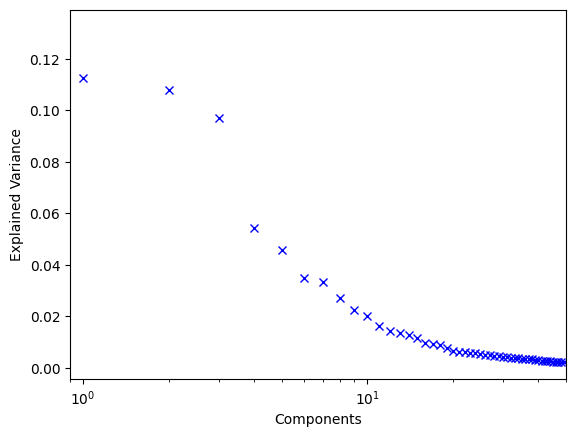

In [16]:

chain='TRB'
v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
vdjdb_v = pd.read_csv(v_path,sep='\t')


tcremb_3000_b = TCRemb.TCRemb(run_name, vdjdb_v)
tcremb_3000_b.tcremb_clonotypes(chain)
tcremb_3000_b.tcremb_dists_count(chain)
tcremb_3000_b.tcremb_dists(chain)
tcremb_3000_b.tcremb_pca(chain)
tcremb_3000_b.tcremb_tsne(chain)


dbscan_3000 = TCRemb.TCRemb_clustering('DBSCAN')

model = DBSCAN(eps=750, min_samples=2)
dbscan_3000.clstr(chain,tcremb_3000_b, label, model=model)

res_clstr_3000[chain] = tcremb_3000_b.annot[chain][[tcremb_3000_b.annotation_id,label]].merge(dbscan_3000.clstr_labels[chain],how='left')
metrics_3000[chain] = metrics.get_clustermetrics(res_clstr_3000[chain], label)

print(metrics_3000[chain])